# DevStats: ¿Qué perfiles y condiciones pagan mejor en desarrollo?

Si eres estudiante de Ciencia de la Computación o estás comenzando en el mundo del software, es normal que te hagas preguntas como:

- **¿Qué tipo de desarrollador gana más?**
- **¿Importa el stack tecnológico o solo la experiencia?**
- **¿Trabajar remoto realmente mejora el salario?**
- **¿Es lo mismo ser “Full-stack JavaScript” que “Backend Python” en términos de pago?**
- **¿Y qué tanto cambia todo dependiendo del país?**

Estas preguntas aparecen en conversaciones informales (foros, Discord, comunidades, profesores), pero suelen responderse con anécdotas:  
*"a mí me pagan más por remoto"*, *"los de data ganan mejor"*, *"en Europa se gana distinto"*.  

Para ir más allá de opiniones,y poder hacer analisis para llegar a conclusiones con rigor cientifico necesitamos un dataset actualizado, con informacion sobre miles de desarrolladores de todo el mundo, respecto a:

- salario anual,
- modalidad de trabajo,
- experiencia,
- educación,
- rol,
- tecnologías utilizadas.

Una de las pocas fuentes públicas que reúne todo eso cada año es el **Stack Overflow Annual Developer Survey 2024**, una encuesta global respondida por decenas de miles de desarrolladores, por esa razon elegimos el archivo oficial `survey_results_public.csv` con N = 65,437 filas y P = 114 columnas, para conocer cual fue el formulario despondido por cada uno de los desarrolloder puede ejecutar el siguiente script:

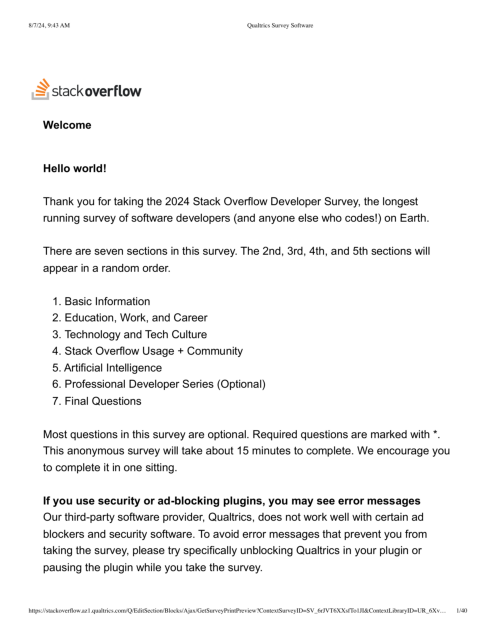

In [475]:
from pdf2image import convert_from_path
import matplotlib.pyplot as plt

pdf_path = "../data/raw/2024 Developer Survey.pdf"
!xdg-open "{pdf_path}"

pages = convert_from_path(pdf_path)

plt.figure(figsize=(12, 8))
plt.imshow(pages[0])
plt.axis("off")
plt.show()

Importemos el dataset con el que estamos trabajando, para obtener una primera vista del dataset observaremos los primeras 5 filas del mismo lo que nos permitira conocer el formato de los datos y las variables con la que cuenta el mismo:

In [476]:
import pandas as pd
import numpy as np

raw_path = "../data/raw/survey_results_public.csv"
df_raw = pd.read_csv(raw_path)

print("Dimensiones (raw):", df_raw.shape)
df_raw.head()

Dimensiones (raw): (65437, 114)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


Ahora que vemos los los datos de las primeras filas del dataset es facil notar que tenemos muchas columnas lo que es realmente util, pero tambien es posible observar que: 

- muchas variables están llenas de valores faltantes,
- otras son multi-selección en texto (listas separadas por `;`como es el caso de *CodingActivities*"),
- algunas mezclan números con strings (“Less than 1 year”),
- y la variable clave (salario) **no está completa**.

Así que antes de poder hacer analisis rigurosos del dataset es necesario responder algo básico:

**¿Qué tan completo está el dataset y cuáles variables son más confiables para análisis?**


In [477]:
na_rate = df_raw.isna().mean().sort_values(ascending=False)

miss = (
    na_rate
    .head(25)
    .reset_index()
    .rename(columns={"index":"variable", 0:"missing_rate"})
)
miss


,variable,missing_rate
0,AINextMuch less integrated,0.982456
1,AINextLess integrated,0.964011
2,AINextNo change,0.809007
3,AINextMuch more integrated,0.794642
4,EmbeddedAdmired,0.744288
5,EmbeddedWantToWorkWith,0.731039
6,EmbeddedHaveWorkedWith,0.660528
7,ConvertedCompYearly,0.641869
8,AIToolNot interested in Using,0.626908
9,AINextMore integrated,0.626694


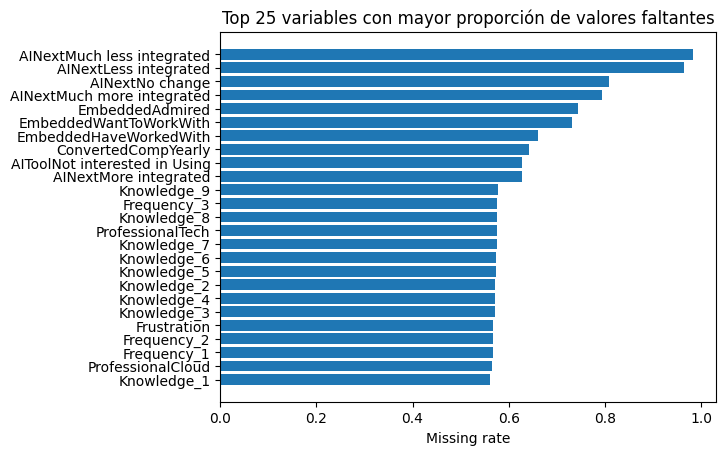

In [478]:
import matplotlib.pyplot as plt

plt.figure()
plt.barh(miss["variable"][::-1], miss["missing_rate"][::-1])
plt.title("Top 25 variables con mayor proporción de valores faltantes")
plt.xlabel("Missing rate")
plt.show()


Los valores que aparecen aquí son el **missingness** por columna:
es decir, la proporción de respuestas que están vacías (`NaN`).

Por ejemplo:

- Un missingness de **0.98** significa que el **98%** de la columna está vacía.
- Un missingness de **0.64** significa que el **64%** está vacío.
- Y un missingness de **0.10** significa que solo el **10%** falta.

### ¿Por qué esto es importante?
Porque si una variable tiene un missingness altísimo, usarla en un modelo o análisis implica:

- perder una gran parte de la muestra,
- trabajar con una subpoblación pequeña,
- y aumentar sesgo / ruido.

### Umbral práctico para descartar variables
No existe un “número universal”, pero en análisis aplicado suele usarse una regla simple:

- **> 80% faltante** → casi siempre se excluye (variable demasiado incompleta)
- **60%–80% faltante** → solo se usa si es esencial (con cuidado)
- **< 60% faltante** → suele ser usable (depende del propósito)

### Observemos algo importante:

Si alguien está estudiando o trabajando en programación, es muy común que sus preguntas giren alrededor de salario:

- ¿qué perfiles ganan más?
- ¿qué modalidad paga mejor?
- ¿cuánto influye la experiencia?
- ¿qué stacks se asocian con mejores condiciones?

Esto hace que el salario sea un objetivo natural para análisis.

En el dataset, el salario anual convertido está en `ConvertedCompYearly`, pero mirando la tabla de missingness, aparece un hecho inevitable:

 -`ConvertedCompYearly` tiene missingness ≈ **0.64** es decir, ~**64%** de la gente no reportó salario.

Esto significa que cualquier análisis salarial tendrá una condición:
**solo describe a la subpoblación que sí reportó compensación anual.**

Antes de avanzar, confirmemos cuántas filas quedan realmente para análisis salarial:

In [479]:
salary_missing = df_raw["ConvertedCompYearly"].isna().mean()
n_total = df_raw.shape[0]
n_salary = df_raw["ConvertedCompYearly"].notna().sum()

print(f"N total: {n_total}")
print(f"N con salario reportado: {n_salary}")
print(f"Missingness salary: {salary_missing:.3f}")
print(f"% con salario: {(1-salary_missing)*100:.1f}%")



N total: 65437
N con salario reportado: 23435
Missingness salary: 0.642
% con salario: 35.8%



#### Veamos la siguiente comparacion donde lo primero que se muestra es el histograma del salario “crudo” y luego el de `log_salary`.



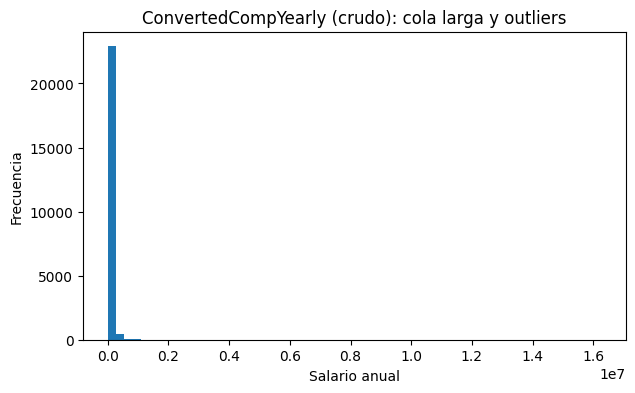

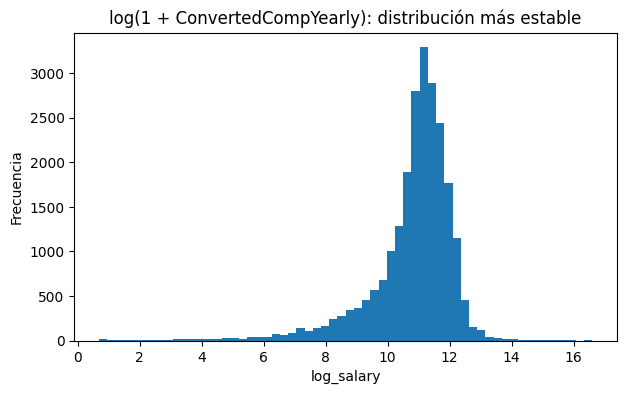

In [480]:
salary = df_raw["ConvertedCompYearly"].dropna()

plt.figure(figsize=(7,4))
plt.hist(salary, bins=60)
plt.title("ConvertedCompYearly (crudo): cola larga y outliers")
plt.xlabel("Salario anual")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(np.log1p(salary), bins=60)
plt.title("log(1 + ConvertedCompYearly): distribución más estable")
plt.xlabel("log_salary")
plt.ylabel("Frecuencia")
plt.show()


Incluso si filtramos solo a quienes reportaron salario, nos queda un problema estadístico común:
el salario no se distribuye de una manera que permita un facil analisis, como se observa en el histograma anterior donde no podemos decir mucho de la distribucion del salario crudo, mientras que al trabajar con la variable que representa el logaritmo del salario observamos una distribucion casi normal.

El problema típico del salario es que la variable de ingresos suele tener:

- **cola larga** (muchos valores medianos/bajos y pocos valores enormes),
- **outliers** muy extremos,
- **varianza creciente** (la dispersión cambia con el nivel de salario),
- y una distribución muy alejada de normalidad.

Esto afecta:
- comparaciones de medias,
- intervalos de confianza,
- modelos lineales (OLS),
- y cualquier inferencia que asuma errores aproximadamente normales o varianza constante, como los que estudiamos en el curso de estadistica.

Una transformación muy común es trabajar con el logaritmo de la variable de la siguiente manera:

 `log_salary = log(1 + ConvertedCompYearly)`

El uso de `log(1+x)` trae beneficios ya que:
- el `+1` evita problemas cuando hay salarios cero o muy pequeños,
- el log comprime los valores extremos,
- estabiliza varianza,
- y hace la distribución más simétrica y manejable como se peude ver en el histograma.

Además, en escala log:
- una diferencia β en OLS se interpreta como un cambio proporcional aproximado,
- y `exp(β) - 1` se puede convertir a %.

Esto hace que:
- las comparaciones por modalidad (Remote/Hybrid/In-person)
- y los modelos ajustados
sean más interpretables y más estables.

Con esto, ya sabemos dos cosas clave:
- el análisis salarial usa solo `has_salary=True` (subpoblación),
- el salario conviene analizarlo en `log_salary`.



Con el análisis de missingness y la transformación del salario ya justificados, el siguiente paso es crear un dataset limpio y consistente para análisis.

La encuesta original contiene muchas columnas y varios formatos difíciles de usar directamente, por lo que construiremos una versión procesada con:

1) **Selección de variables relevantes** (reducir ruido y mantener lo esencial)  
2) **Limpieza y estandarización** (categorías, strings, formatos numéricos)  
3) **Variables derivadas** (has_salary, log_salary, YearsCodePro_num)  
4) **Checklist de consistencia** (verificar tamaños y NA después de procesar)  
5) **Exportación** a `df_final_v1.csv`, que será el dataset usado en todo el análisis.

##  Selección de columnas relevantes

El dataset crudo tiene más de 100 columnas, pero muchas están casi vacías
o corresponden a secciones que no aportan mucho a los objetivos de este proyecto.

En cambio, hay variables que aparecen constantemente cuando alguien se interesa por el mundo de la programación, por ejemplo:

- **salario** (¿cuánto se gana?),
- **modalidad de trabajo** (remoto, híbrido, presencial),
- **experiencia** (años en el área),
- **educación** (si influye o no),
- **rol o tipo de desarrollador** (backend, data, full-stack, etc.),
- **país** (por diferencias del mercado),
- y **tecnologías** (lenguajes, bases, frameworks, herramientas).

Estas variables tienen dos ventajas:

1) **son interpretables y útiles para análisis** (permiten comparaciones y visualizaciones claras),
2) tienden a tener suficiente disponibilidad de datos para construir un dataset procesado utilizable.

Por ello, reducimos el dataset a un conjunto compacto que mantenga estas dimensiones esenciales,
con el objetivo de que el análisis posterior se enfoque en patrones reales y no en ruido de columnas incompletas.


In [481]:
FINAL_COLS = [
    "ResponseId",
    "MainBranch", "Employment",
    "Country", "RemoteWork",
    "ConvertedCompYearly",
    "YearsCodePro", "YearsCode",
    "DevType", "EdLevel",
    "Age", "OrgSize",
    "LanguageHaveWorkedWith",
    "DatabaseHaveWorkedWith",
    "WebframeHaveWorkedWith",
    "PlatformHaveWorkedWith",
    "ToolsTechHaveWorkedWith"
]

df = df_raw[FINAL_COLS].copy()
print("After selecting FINAL_COLS:", df.shape)
df.head()


After selecting FINAL_COLS: (65437, 17)


,ResponseId,MainBranch,Employment,Country,RemoteWork,ConvertedCompYearly,YearsCodePro,YearsCode,DevType,EdLevel,Age,OrgSize,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,WebframeHaveWorkedWith,PlatformHaveWorkedWith,ToolsTechHaveWorkedWith
0,1,I am a developer by profession,"Employed, full-time",United States of America,Remote,NaN,NaN,NaN,NaN,Primary/elementary school,Under 18 years old,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",United Kingdom of Great Britain and Northern I...,Remote,NaN,17,20,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",35-44 years old,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,Express;Next.js;Node.js;React,Amazon Web Services (AWS);Heroku;Netlify,Docker;Homebrew;Kubernetes;npm;Vite;Webpack
2,3,I am a developer by profession,"Employed, full-time",United Kingdom of Great Britain and Northern I...,Remote,NaN,27,37,Developer Experience,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",45-54 years old,NaN,C#,Firebase Realtime Database,ASP.NET CORE,Google Cloud,MSBuild
3,4,I am learning to code,"Student, full-time",Canada,NaN,NaN,NaN,4,"Developer, full-stack",Some college/university study without earning ...,18-24 years old,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,MongoDB;MySQL;PostgreSQL;SQLite,jQuery;Next.js;Node.js;React;WordPress,Amazon Web Services (AWS);Fly.io;Heroku,Docker;npm;Pip
4,5,I am a developer by profession,"Student, full-time",Norway,NaN,NaN,NaN,9,"Developer, full-stack","Secondary school (e.g. American high school, G...",18-24 years old,NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust,PostgreSQL;SQLite,NaN,NaN,APT;Make;npm


#### Variables derivadas (para estabilidad y consistencia)

Ahora que tenemos las columnas que mas nos interesan seleccionadas, es momento de agregar las variables derivadas de las que tenemos que nos simplificaran analisis posteriores, como por ejemplo:

- `has_salary`: indicador de salario reportado.
- `log_salary`: salario transformado para estabilidad y mejor forma de distribución como mencionamos anteriormente.
- `YearsCodePro_num`: experiencia profesional convertida a formato numérico.

In [482]:
df["has_salary"] = df["ConvertedCompYearly"].notna()
df["log_salary"] = np.log1p(df["ConvertedCompYearly"])

def clean_years_code_pro(x):
    if pd.isna(x):
        return np.nan
    if isinstance(x, str):
        x = x.strip()
        if x == "Less than 1 year":
            return 0.5
        if x == "More than 50 years":
            return 50
    try:
        return float(x)
    except:
        return np.nan

df["YearsCodePro_num"] = df["YearsCodePro"].apply(clean_years_code_pro)

df[["YearsCodePro", "YearsCodePro_num"]].head(10)


,YearsCodePro,YearsCodePro_num
0,NaN,NaN
1,17,17.0
2,27,27.0
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,7,7.0
7,NaN,NaN
8,NaN,NaN
9,11,11.0


#### Estandarización de categorías: RemoteWork

Otra columna que puede interesarnos mucho es `RemoteWork`, porque captura un aspecto de la realidad laboral moderna.
Para asegurarnos de que todo el análisis posterior sea consistente,
nos quedamos solo con las tres categorías principales:

- Remote
- Hybrid (some remote, some in-person)
- In-person

Cualquier otra forma rara o vacía se registra como NA.


In [483]:
valid_remote = ["Remote", "Hybrid (some remote, some in-person)", "In-person"]
df.loc[~df["RemoteWork"].isin(valid_remote), "RemoteWork"] = np.nan

df["RemoteWork"].value_counts(dropna=False)


RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
NaN                                     10631
Name: count, dtype: int64

#### Limpieza ligera de strings y columnas multi-selección

Como vimos en el inicio del analisis del dataset hay variables como `DevType` o las tecnologías (`LanguageHaveWorkedWith`, etc.) que vienen como texto, y a veces incluyen valores vacíos mal interpretados.

En esta etapa para asegurar consistencia básica vamos a:

- convertir a string (o NA),
- eliminar casos vacíos como texto,
- mantener un formato uniforme.


In [484]:
# Limpiar Country
df["Country"] = df["Country"].astype(str).str.strip()
df["Country"] = df["Country"].replace({"nan": np.nan, "": np.nan})

# Homogeneizar columnas multi-select
multi_cols = [
    "DevType",
    "LanguageHaveWorkedWith",
    "DatabaseHaveWorkedWith",
    "WebframeHaveWorkedWith",
    "PlatformHaveWorkedWith",
    "ToolsTechHaveWorkedWith"
]

for c in multi_cols:
    df[c] = df[c].astype("string")
    df[c] = df[c].replace({"nan": pd.NA, "": pd.NA})

df[multi_cols].head()


,DevType,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,WebframeHaveWorkedWith,PlatformHaveWorkedWith,ToolsTechHaveWorkedWith
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,"Developer, full-stack",Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,Express;Next.js;Node.js;React,Amazon Web Services (AWS);Heroku;Netlify,Docker;Homebrew;Kubernetes;npm;Vite;Webpack
2,Developer Experience,C#,Firebase Realtime Database,ASP.NET CORE,Google Cloud,MSBuild
3,"Developer, full-stack",C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,MongoDB;MySQL;PostgreSQL;SQLite,jQuery;Next.js;Node.js;React;WordPress,Amazon Web Services (AWS);Fly.io;Heroku,Docker;npm;Pip
4,"Developer, full-stack",C++;HTML/CSS;JavaScript;Lua;Python;Rust,PostgreSQL;SQLite,<NA>,<NA>,APT;Make;npm


#### Sanity checks

Antes de exportar el dataset procesado, hacemos un **sanity test**: un conjunto de verificaciones rápidas que sirven para confirmar que la limpieza y transformaciones no introdujeron errores y que el dataset quedó en un estado coherente.

La idea del sanity check no es “analizar” todavía, sino responder preguntas muy básicas:

- **¿El dataset tiene el número esperado de filas y columnas?**  
  (para asegurarnos de que no filtramos accidentalmente demasiadas filas o eliminamos columnas sin intención)

- **¿Qué proporción de la muestra realmente tiene salario reportado?** (`has_salary_rate`)  
  Esto nos recuerda el tamaño efectivo de la subpoblación que podremos usar para análisis salariales.

- **¿Cuánto missingness quedó en variables clave?**  
  Medimos el porcentaje de valores faltantes en columnas fundamentales como:
  - `RemoteWork`
  - `Country`
  - `YearsCodePro_num`
  - `log_salary`

Estas métricas son útiles porque, si alguna aparece con missingness inesperadamente alto, puede indicar:
- un problema de parsing,
- un error en una transformación,
- o que alguna variable debería tratarse de otra forma (por ejemplo, redefinir categorías o imputar si fuera necesario).

En resumen, estos sanity checks funcionan como un “control de calidad” final antes de guardar el dataset limpio.


In [485]:
print("Processed shape:", df.shape)

checks = {
    "has_salary_rate": df["has_salary"].mean(),
    "RemoteWork_missing": df["RemoteWork"].isna().mean(),
    "Country_missing": df["Country"].isna().mean(),
    "YearsCodePro_num_missing": df["YearsCodePro_num"].isna().mean(),
    "log_salary_missing": df["log_salary"].isna().mean(),
}
checks


Processed shape: (65437, 20)


{'has_salary_rate': np.float64(0.358130721151642),
 'RemoteWork_missing': np.float64(0.16246160429115028),
 'Country_missing': np.float64(0.09943915521799593),
 'YearsCodePro_num_missing': np.float64(0.21130247413542796),
 'log_salary_missing': np.float64(0.641869278848358)}

#### Exportación del dataset procesado

Como los valores del sanity check son buenos, podemos pasar a guardar el dataset resultante como `df_final_v1.csv`.

In [486]:
out_path = "../data/processed/df_final_v1.csv"
df.to_csv(out_path, index=False)
print(f"✅ Exportado a: {out_path}")

✅ Exportado a: ../data/processed/df_final_v1.csv


#### Ahora estamos listos para trabajar con el dataset con los datos que cumplen con todos los parametros que establecimos

Processed shape: (65437, 20)


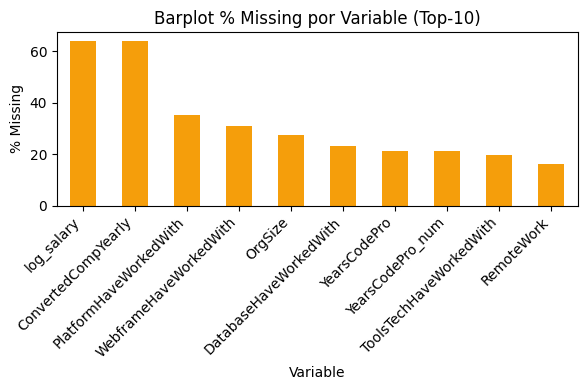

Describe variables (USD salary y YearsCodePro_num):
       ConvertedCompYearly  YearsCodePro_num
count         2.343500e+04      51610.000000
mean          8.615529e+04         10.211044
std           1.867570e+05          9.075136
min           1.000000e+00          0.500000
25%           3.271200e+04          3.000000
50%           6.500000e+04          7.000000
75%           1.079715e+05         15.000000
max           1.625660e+07         50.000000


,ResponseId,MainBranch,Employment,Country,RemoteWork,ConvertedCompYearly,YearsCodePro,YearsCode,DevType,EdLevel,Age,OrgSize,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,WebframeHaveWorkedWith,PlatformHaveWorkedWith,ToolsTechHaveWorkedWith,has_salary,log_salary,YearsCodePro_num
0,1,I am a developer by profession,"Employed, full-time",United States of America,Remote,NaN,NaN,NaN,NaN,Primary/elementary school,Under 18 years old,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",United Kingdom of Great Britain and Northern I...,Remote,NaN,17,20,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",35-44 years old,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,Express;Next.js;Node.js;React,Amazon Web Services (AWS);Heroku;Netlify,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,False,NaN,17.0
2,3,I am a developer by profession,"Employed, full-time",United Kingdom of Great Britain and Northern I...,Remote,NaN,27,37,Developer Experience,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",45-54 years old,NaN,C#,Firebase Realtime Database,ASP.NET CORE,Google Cloud,MSBuild,False,NaN,27.0
3,4,I am learning to code,"Student, full-time",Canada,NaN,NaN,NaN,4,"Developer, full-stack",Some college/university study without earning ...,18-24 years old,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,MongoDB;MySQL;PostgreSQL;SQLite,jQuery;Next.js;Node.js;React;WordPress,Amazon Web Services (AWS);Fly.io;Heroku,Docker;npm;Pip,False,NaN,NaN
4,5,I am a developer by profession,"Student, full-time",Norway,NaN,NaN,NaN,9,"Developer, full-stack","Secondary school (e.g. American high school, G...",18-24 years old,NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust,PostgreSQL;SQLite,NaN,NaN,APT;Make;npm,False,NaN,NaN


In [487]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/df_final_v1.csv")
print("Processed shape:", df.shape)

missing_pct = df.isna().mean().sort_values(ascending=False).head(10) * 100
plt.figure(figsize=(6, 4))
missing_pct.plot(kind="bar", color="#f59e0b")
plt.title("Barplot % Missing por Variable (Top-10)")
plt.xlabel("Variable")
plt.ylabel("% Missing")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

salary_col = "ConvertedCompYearly"
years_col = "YearsCodePro_num"
describe_cols = [salary_col, years_col]
print("Describe variables (USD salary y YearsCodePro_num):")
print(df[describe_cols].describe(percentiles=[0.25, 0.5, 0.75]))


df.head()


Ya con una variable salarial estable, el siguiente paso natural es observar variables que suelen aparecer en conversaciones sobre desarrollo y las relaciones entre ellas:
- **Salario**
- **Modalidad de trabajo** (`RemoteWork`)
- **Experiencia profesional** (`YearsCodePro_num`)
- **Educación** (`EdLevel`)
- **Rol / tipo de developer** (`DevType`)
- **País** (`Country`)


#### Modalidad de trabajo: ¿se paga distinto?

En los últimos años, remoto e híbrido se convirtieron en parte central del mercado.
Es común escuchar frases como:

- “en remoto pagan más”
- “presencial te limita”
- “híbrido depende del país”

Antes de convertir eso en una pregunta formal, hagamos un análisis simple:

-descriptivos por grupo  
-boxplot por grupo  

Para ver si aparece algún patrón claro.


In [488]:
tmp = df[df["has_salary"]==True].dropna(subset=["RemoteWork","log_salary"])
tmp.groupby("RemoteWork")["log_salary"].agg(["count","mean","median","std"]).sort_values("mean", ascending=False)

,count,mean,median,std
RemoteWork,,,,
"Hybrid (some remote, some in-person)",9899,10.881707,11.106355,1.200008
Remote,9591,10.864146,11.225257,1.513688
In-person,3937,10.353943,10.705198,1.512012


/tmp/ipykernel_556592/4224810160.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


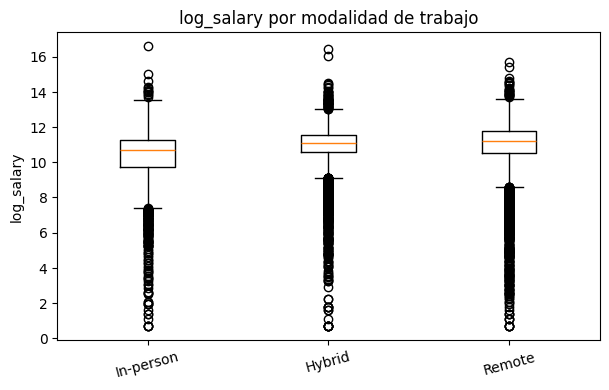

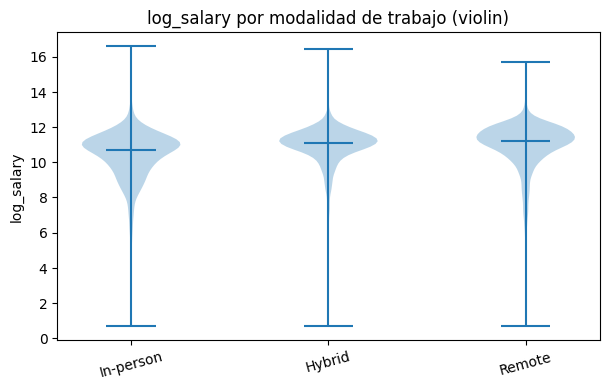

In [ ]:
order = ["In-person", "Hybrid (some remote, some in-person)", "Remote"]
labels = ["In-person", "Hybrid", "Remote"]
data = [tmp.loc[tmp["RemoteWork"]==g, "log_salary"] for g in order]

import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.boxplot(data, labels=labels)
plt.title("log_salary por modalidad de trabajo")
plt.ylabel("log_salary")
plt.xticks(rotation=15)
plt.show()

plt.figure(figsize=(7,4))
plt.violinplot(data, showmedians=True)
plt.title("log_salary por modalidad de trabajo (violin)")
plt.ylabel("log_salary")
plt.xticks(range(1, len(labels) + 1), labels, rotation=15)


plt.show()


El boxplot anterior muestra la distribución de `log_salary` para las tres modalidades:
- **In-person**
- **Hybrid (some remote, some in-person)**
- **Remote**

A primera vista, aparecen varios elementos interesantes como que la línea central de cada caja (mediana) sugiere un patrón consistente ya que  **Hybrid y Remote presentan medianas más altas que In-person.** Esto sugiere que, al menos de forma descriptiva, el trabajo no presencial podría estar asociado con salarios más altos.

Ademas es facil observar que la altura de las cajas (rango intercuartílico, IQR) y la longitud de los bigotes indican que:

- Las tres modalidades tienen **variabilidad considerable**.
- Hay dispersión similar en Hybrid y Remote, aunque Remote parece contener una cola más amplia hacia valores bajos.

Esto nos recuerda que, aunque las medianas difieran, hay bastante solapamiento entre grupos.

#### Presencia masiva de outliers (especialmente hacia abajo)
El gráfico muestra muchos puntos fuera de los bigotes (outliers), sobre todo hacia valores bajos.

Esto puede deberse a:
- heterogeneidad real del mercado laboral (salarios muy distintos dentro de la misma modalidad),
- diferencias entre países,
- y diferencias de experiencia y rol.

En otras palabras, como ya sabemos, la modalidad por sí sola **no explica toda la variación salarial**.


Esta visualizacion deja dos dudas importantes:

#### 1-¿La diferencia que intuimos en el grafico de cajas y bigotes es real?
Aunque Hybrid y Remote parecen estar arriba de In-person,
a simple vista no podemos saber si:

- la diferencia se mantiene cuando consideramos la variabilidad,
- o si es solo un efecto de tamaño muestral / ruido.

Esto nos lleva a formalizar la primera pregunta a la que respondera este proyecto investigativo:

**RQ1:**  
> ¿Difiere el salario anual (en escala logarítmica) entre Remote, Hybrid e In-person?

### 2-¿Qué está causando esa diferencia?
Aunque el patrón sugiere diferencias, también podría estar influenciado por factores externos, por ejemplo:

- ¿Remote tiene más personas de ciertos países mejor pagados?
- ¿Hybrid tiene más personas con experiencia alta?
- ¿Los roles (DevType) se distribuyen distinto por modalidad?

Estas dudas no se responden todavía aquí, pero anticipan la necesidad de ajustes posteriores (y motivan naturalmente la siguiente etapa del análisis).


# ¿Difiere el salario anual entre Remote, Hybrid e In-person?

Como analizamos anteriormente, con el objetivo de estabilizar la distribucion del salario y reducir el efecto de outliers, usaremos  `log_salary` para poder responder a la pregunta planteada.

El objetivo inicial en este momento es:

> **comparar la media de una variable numérica (`log_salary`) entre más de dos grupos (3 modalidades).**

Y es muy comun en estudios estadisticos realizar lo anterior empleando One-Way ANOVA o ANOVA de una via el cual permite evaluar si las medias de `log_salary` son iguales en los tres grupos o si al menos una difiere. Pero antes conviene preparar el dataset y realizar otras pruebas mas sencillas que nos permitiran inferir lo que ocurre realmente.

Aunque el dataset completo contiene muchas respuestas, **no todas incluyen salario anual**, y además la comparación por modalidad solo tiene sentido si sabemos la modalidad de cada participante.

Por tanto, para que la comparación sea válida, definimos la *población efectiva* como el conjunto de participantes que cumplen:

- tienen `log_salary` (salario reportado y transformado)
- tienen `RemoteWork` (modalidad de trabajo reportada)

Este filtro no es solo un paso técnico pues nos asegura que todas las observaciones que entran al ANOVA tienen información suficiente y evita que el modelo trabaje con filas incompletas o comparaciones sesgadas.

In [490]:
# Subpoblación efectiva para RQ1
d = df.dropna(subset=["log_salary", "RemoteWork"]).copy()

print("N total dataset procesado:", len(df))
print("N población efectiva (log_salary + RemoteWork):", len(d))

d["RemoteWork"].value_counts()

N total dataset procesado: 65437
N población efectiva (log_salary + RemoteWork): 23427


RemoteWork
Hybrid (some remote, some in-person)    9899
Remote                                  9591
In-person                               3937
Name: count, dtype: int64

Antes de hacer una prueba estadística, conviene responder algo más básico:

> **¿Cómo se ven los datos por grupo en términos numéricos?**

El objetivo de este paso es triple:

1) **describir** el patrón observado en el boxplot con medidas concretas (media y mediana),
2) **cuantificar** el tamaño de cada grupo (n), para saber si la comparación es estable,
3) y **anticipar** si hay diferencias en dispersión (desviación estándar), lo cual será relevante más adelante para los supuestos del ANOVA.

En otras palabras: *primero entendemos los grupos; luego probamos hipótesis*.

In [491]:
desc = (
    d.groupby("RemoteWork")["log_salary"]
    .agg(n="count", mean="mean", sd="std", median="median")
    .sort_values("mean", ascending=False)
)
desc


,n,mean,sd,median
RemoteWork,,,,
"Hybrid (some remote, some in-person)",9899,10.881707,1.200008,11.106355
Remote,9591,10.864146,1.513688,11.225257
In-person,3937,10.353943,1.512012,10.705198


### Lectura de los descriptivos

Los resultados muestran que:

- **Hybrid** y **Remote** tienen valores medios y medianos más altos que **In-person**.
- Los tamaños de muestra son suficientemente grandes (miles en cada modalidad), lo que da estabilidad a la comparación.
- También se observa que la dispersión (`sd`) no es idéntica entre grupos, lo que podría anticipar posibles diferencias de varianza.

En resumen, el patrón descriptivo coincide con lo observado gráficamente:

$$
\text{Hybrid} \approx \text{Remote} > \text{In-person}
$$

Pero una diferencia descriptiva no es suficiente para concluir.
Ahora la pregunta formal es:

>**¿Esas diferencias podrían explicarse por azar, o son estadísticamente significativas?**


Con los descriptivos en mano, pasamos ahora a un contraste estadístico formal.

Como queremos comparar la **media** de `log_salary` entre **tres grupos** (In-person, Hybrid y Remote), el primer método estándar es el **ANOVA de una vía (one-way ANOVA)**.

La lógica del ANOVA es sencilla:

- Si la modalidad de trabajo **no tuviera ninguna relación con el salario**, entonces las medias de los grupos serían similares y la variación *entre* grupos sería pequeña.
- Si, por el contrario, la modalidad **sí estuviera asociada con diferencias salariales**, entonces la variación *entre* medias de grupos sería grande en comparación con la variación *dentro* de cada grupo.

Esa comparación se resume en el estadístico **F**:

$$
F=\frac{\text{variación entre grupos}}{\text{variación dentro de los grupos}}
$$

Un valor grande de \(F\) indica que las medias de los grupos están más separadas de lo que esperaríamos solo por variación interna.

### Hipótesis

- **H0:** las medias de `log_salary` son iguales en las 3 modalidades  
  $$
  \mu_{Remote}=\mu_{Hybrid}=\mu_{In-person}
  $$
- **H1:** al menos una media difiere.

Para ejecutar el ANOVA, ajustamos un modelo lineal donde `RemoteWork` actúa como un **factor categórico**:

$$
\text{log\_salary} \sim C(\text{RemoteWork})
$$



In [492]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Modelo ANOVA: log_salary explicado por modalidad (factor)
model = smf.ols("log_salary ~ C(RemoteWork)", data=d).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(RemoteWork),884.175795,2.0,228.977542,3.280390e-99
Residual,45224.814646,23424.0,NaN,NaN



La tabla ANOVA nos muestra un resultado contundente:

- $F(2, 23424) = 228.98$
- $p = 3.28 \times 10^{-99}$

Dado que el p-valor es extremadamente pequeño, rechazamos la hipótesis nula $H_0$.
Esto implica que existe evidencia estadísticamente significativa para concluir que  **la media de `log_salary` no es igual en las tres modalidades de trabajo.** (al menos una modalidad difiere de las demás)

Sin embargo, este resultado todavía deja dos preguntas abiertas:

#### ¿Entre qué grupos está la diferencia?
El ANOVA solo nos dice que existe una diferencia *global*, pero no identifica:

- si Remote difiere de In-person,
- si Hybrid difiere de In-person,
- o si Remote y Hybrid difieren entre sí.

Por lo tanto, el siguiente paso natural será aplicar comparaciones por pares (*post-hoc*) para localizar dónde están las diferencias.

#### ¿Qué tan confiable es este resultado bajo los supuestos del ANOVA?
El ANOVA clásico asume:
- normalidad aproximada de los residuos,
- y homocedasticidad (varianzas similares entre grupos).

Aunque el tamaño muestral es grande (lo cual suele hacer el ANOVA robusto), es importante verificar:
- si la dispersión por grupo es similar,
- y si los residuos presentan una forma razonable.

Si estos supuestos no se cumplen, necesitaremos alternativas más robustas (Welch ANOVA, Kruskal–Wallis) para confirmar que el patrón no depende de supuestos idealizados.




## Diagnóstico del modelo: ¿qué tan confiable es el ANOVA?

El ANOVA nos indicó que existen diferencias globales entre modalidades, pero todavía falta responder algo importante:

> **¿Podemos confiar en este resultado bajo los supuestos del ANOVA clásico?**

El ANOVA se implementa mediante un modelo lineal.  
Y en modelos lineales, gran parte de la validez de la inferencia depende de cómo se comportan los **residuos**:

$$
\text{residuo}_i = y_i - \hat{y}_i
$$

Intuitivamente, los residuos representan lo que el modelo no logra explicar.
Si el modelo está bien especificado y sus supuestos son razonables, los residuos deberían:

- estar centrados alrededor de 0,
- no mostrar patrones sistemáticos,
- y tener una distribución aproximadamente normal (especialmente relevante para intervalos y tests clásicos).

Por eso, antes de continuar con comparaciones por pares, empezamos revisando un resumen básico de los residuos.


In [493]:
resid = model.resid
fitted = model.fittedvalues

resid.describe()


count    2.342700e+04
mean     1.778556e-14
std      1.389438e+00
min     -1.018856e+01
25%     -3.708145e-01
50%      2.921185e-01
75%      7.996612e-01
max      6.250067e+00
dtype: float64


El resumen numérico de los residuos del modelo ANOVA es que:

- **n = 23,427 residuos**, lo que coincide con la población efectiva usada en el modelo.  
- **media ≈ 1.78×10⁻¹⁴**, prácticamente cero.  
  Esto es exactamente lo que esperamos en un modelo lineal con intercepto: los residuos quedan centrados alrededor de 0, lo cual sugiere que el modelo no está sistemáticamente “sobreestimando” o “subestimando” los salarios en promedio.
- **desviación estándar ≈ 1.39**, lo cual nos da una idea del tamaño típico del error residual en escala logarítmica.  
  En otras palabras, incluso dentro de cada modalidad hay una variabilidad considerable de salarios que el modelo no explica únicamente con `RemoteWork` lo cual resulta interesante, e investigaremos posteriormente.
- El rango es amplio:
  - **mínimo = -10.19**
  - **máximo = 6.25**

Este rango sugiere la presencia de **residuos extremos (outliers)**, especialmente hacia valores negativos.
En términos prácticos, significa que existen observaciones cuyo salario real es **mucho menor** que lo que el modelo predice para su modalidad, y otras cuyo salario es mucho mayor.

Además, el hecho de que el residuo mínimo sea mucho más extremo que el máximo sugiere una posible asimetría (cola más larga hacia salarios menores de lo esperado), lo cual refuerza la importancia de inspeccionar la normalidad visualmente.

#### ¿Qué significa esto para el ANOVA?
Estos resultados no invalidan el ANOVA automáticamente (de hecho, con un tamaño muestral grande suele ser robusto), pero sí nos alertan de que puede haber **colas pesadas** en la distribución de residuos, y la normalidad podría no ser perfecta, lo que hace necesario revisar diagnósticos visuales y varianzas por grupo. Por esa razón, el siguiente paso natural que haremos sera verificar la forma de los residuos con un **QQ-plot** y revisar si hay patrones con **residuos vs ajustados**.


<Figure size 600x600 with 0 Axes>

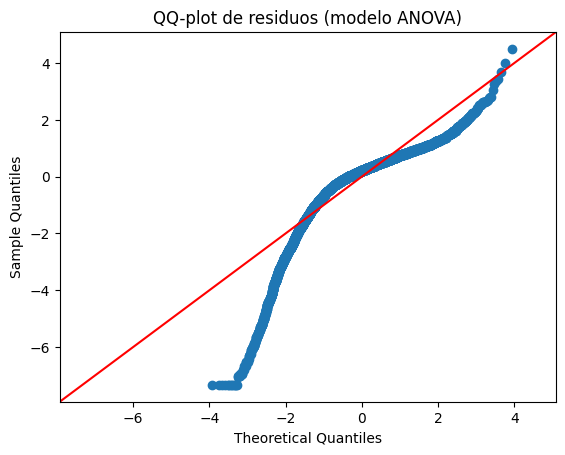

In [494]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
sm.qqplot(resid, line="45", fit=True)
plt.title("QQ-plot de residuos (modelo ANOVA)")
plt.show()


El QQ-plot compara los cuantiles de los residuos observados con los cuantiles de una **normal teórica**.  
Si los residuos fueran aproximadamente normales, los puntos deberían alinearse cerca de la línea roja.

En nuestro caso, el gráfico muestra un patrón claro:

 **En la zona central** (alrededor de 0), los puntos siguen relativamente bien la línea, lo cual indica que para la mayor parte de observaciones el comportamiento de los residuos es razonable.

Sin embargo:

 **En las colas** se observa una desviación fuerte respecto a la línea recta, con una forma pronunciada en “S” y curvaturas marcadas, lo que coincide con lo que habiamos notados anteriormente por lo que conviene analizar residuos vs valores ajustados, para ver si hay patrones o heterocedasticidad

Un modelo lineal asume que el error tiene varianza aproximadamente constante.
Un gráfico útil para detectar problemas es:

 **Residuos vs valores ajustados**

Si todo está bien, esperamos ver:
- una nube alrededor de 0,
- sin forma clara,
- y con dispersión similar a lo largo del eje.

Si la dispersión crece o decrece con el valor ajustado (forma de embudo),
eso sugiere heterocedasticidad, lo cual afecta la confiabilidad del ANOVA clásico.


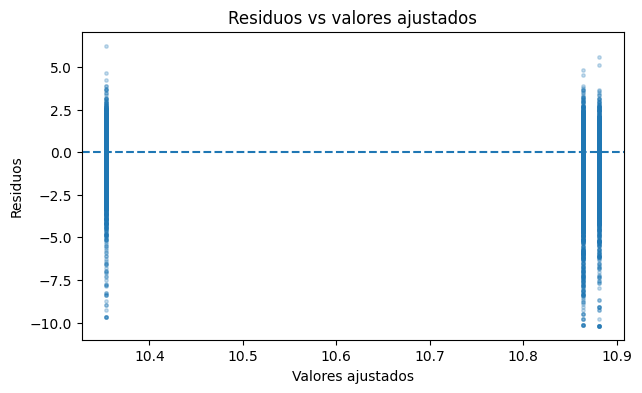

In [495]:
plt.figure(figsize=(7,4))
plt.scatter(fitted, resid, s=6, alpha=0.25)
plt.axhline(0, linestyle="--")
plt.title("Residuos vs valores ajustados")
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.show()


En este caso, el gráfico muestra tres columnas de puntos. Esto es esperable porque el modelo ANOVA con `RemoteWork` como factor produce **solo tres valores ajustados posibles**, correspondientes a las medias estimadas de cada modalidad.  
Por esta razón, la nube de puntos no es continua, sino que se agrupa en tres bandas verticales.

Aun así, este gráfico resulta informativo para evaluar dos aspectos clave del modelo:

### 1) ¿Los residuos están centrados alrededor de 0?
En las tres bandas, los residuos se distribuyen tanto por encima como por debajo de la línea horizontal en 0, sin un desplazamiento sistemático hacia un lado.  
Esto sugiere que, en promedio, el modelo no presenta sesgo: no sobreestima ni subestima consistentemente el salario para ninguna modalidad.

### 2) ¿Cómo es la dispersión dentro de cada grupo?
La dispersión vertical de los residuos es considerable en las tres modalidades y no es idéntica entre ellas.  
Además, se observan **colas extendidas**, particularmente hacia residuos negativos grandes.

Este patrón es coherente con lo observado previamente en:
- el resumen numérico de residuos (rango amplio y valores extremos),
- y el QQ-plot (desviaciones marcadas en las colas respecto a la normal).

#### Conclusión del diagnóstico gráfico

En conjunto, el gráfico de residuos vs valores ajustados indica que:
- el modelo no muestra una mala especificación evidente (no hay patrones curvos ni tendencias sistemáticas),
- pero sí existe **alta variabilidad residual** y **presencia de colas pesadas**, lo cual es consistente con la heterogeneidad salarial esperable en este tipo de datos.


¿Entonces el ANOVA “sirve” o no?

Con un tamaño muestral grande, el ANOVA suele ser relativamente robusto a desviaciones moderadas de normalidad.
Además, nuestro objetivo principal en este punto es detectar si existe evidencia global de diferencias entre modalidades, lo cual ya se observó.

Sin embargo, el diagnóstico sugiere que **la inferencia clásica (especialmente comparaciones por pares) podría verse afectada por colas pesadas y posible heterocedasticidad.**

Por eso, en lugar de abandonar el análisis, lo correcto es complementarlo con dos acciones:

1) **Robustez (confirmación del resultado global):**  
   Aplicar un contraste alternativo menos sensible a supuestos ideales  
   (por ejemplo, Welch ANOVA o Kruskal–Wallis).

2) **Localización de diferencias (post-hoc):**  
   Una vez confirmado el efecto global con un enfoque robusto, podremos realizar las comparaciones por pares antes mencionadas con un método adecuado para datos con varianzas potencialmente distintas (por ejemplo, Games–Howell) para responder:

    *¿Remote difiere de In-person?*  
    *¿Hybrid difiere de In-person?*  
    *¿Remote y Hybrid difieren entre sí?*

En la siguiente sección aplicamos estos contrastes robustos y luego realizamos el post-hoc para identificar específicamente dónde están las diferencias.

#### Dado lo anterior y para confirmar que la conclusión (diferencias globales entre modalidades) no depende de supuestos demasiado estrictos, emplearemos un método robusto.

#### ¿Qué es Welch ANOVA y para qué se utiliza?

El **Welch ANOVA** es una variante del ANOVA de una vía diseñada para un escenario muy común en datos reales **cuando las varianzas entre grupos no son iguales (heterocedasticidad)** y/o cuando el tamaño de los grupos es distinto.

A diferencia del ANOVA clásico, Welch:

- **no asume varianzas iguales**,  
- ajusta los **grados de libertad** de forma automática,
- y produce un contraste global más confiable cuando hay dispersión diferente entre grupos.

En términos prácticos, Welch responde la misma pregunta que el ANOVA clásico:

> **¿hay evidencia de que al menos una media difiere entre los grupos?**

pero lo hace con una inferencia más robusta ante desigualdad de varianzas.

#### ¿Qué aporta Welch que no teníamos?

Aunque ya teníamos un ANOVA altamente significativo, ese resultado se basa en supuestos clásicos.
Welch aporta:

- una validación del efecto global **sin depender de homocedasticidad**,  
- y nos permite avanzar al post-hoc con mayor confianza, especialmente si más adelante queremos usar comparaciones por pares robustas (Games–Howell).

En otras palabras:

📌 *no usamos Welch para “buscar significancia”, sino para confirmar que el hallazgo es estable.*

#### ¿Por qué no usamos Kruskal–Wallis como alternativa principal?

**Kruskal–Wallis** es una prueba no paramétrica que compara distribuciones usando rangos.
Es útil cuando la normalidad falla fuertemente, pero tiene dos limitaciones relevantes aquí:

1) **No contrasta medias**, sino diferencias en distribuciones/medianas.Como nuestra pregunta (y la interpretación posterior) está centrada en comparar **medias** de `log_salary`, Welch es más coherente con el objetivo principal.

2) Con tamaños muestrales grandes, Kruskal–Wallis suele detectar diferencias pequeñas con facilidad, pero la interpretación puede ser menos directa si queremos expresar resultados en términos de diferencias promedio.

Por eso, en este flujo de análisis usamos **Welch ANOVA** como alternativa robusta principal para contrastar medias.

Con esta motivación, pasamos a ejecutar el Welch ANOVA para comprobar si la diferencia global entre modalidades se mantiene bajo un enfoque más robusto.

In [496]:
# Welch ANOVA (robusto a varianzas distintas) para: log_salary ~ RemoteWork
import pingouin as pg

welch_res = pg.welch_anova(dv="log_salary", between="RemoteWork", data=d)
welch_res

,Source,ddof1,ddof2,F,p-unc,np2
0,RemoteWork,2,10297.436453,202.713616,4.482265e-87,0.019176


Dado los valores obtenidos al ejecutar Welch-Anova:

- El p-valor extremadamente pequeño confirma que **existen diferencias globales en la media de `log_salary`** entre modalidades, incluso bajo un enfoque robusto.
- El tamaño de efecto $\eta_p^2$ indica que la modalidad explica alrededor de **1.9%** de la variabilidad de `log_salary`.  
  Esto sugiere un efecto **estadísticamente muy claro** (por el gran tamaño muestral), pero de **magnitud pequeña a moderada**, lo cual es común en datasets grandes: diferencias reales pueden ser detectadas con alta potencia aunque no expliquen la mayor parte de la variación salarial.

Con esto, ya no solo tenemos evidencia con ANOVA clásico, sino también una confirmación robusta.


Tanto el ANOVA clásico como Welch ANOVA nos dijeron lo mismo:

**Existen diferencias globales en la media de `log_salary` entre modalidades.**

Pero ese resultado todavía es incompleto, porque deja abierta la parte más útil para interpretar:

> **¿Qué modalidades difieren entre sí exactamente?**  
> ¿Remote difiere de In-person? ¿Hybrid difiere de In-person? ¿Remote y Hybrid son distintos?

Esta pregunta es interesante por dos razones:

1) **Interpretación práctica:**  
   Un resultado “global” no nos permite traducir el hallazgo a algo concreto. En cambio, las comparaciones por pares nos permiten decir, por ejemplo, si “Remote” está asociado con un salario mayor que “In-person” y en qué magnitud.

2) **Conexión con el patrón descriptivo:**  
   El boxplot y los descriptivos sugerían el patrón:

   $$
   \text{Hybrid} \approx \text{Remote} > \text{In-person}
   $$

   El post-hoc nos permite confirmar si ese patrón se sostiene estadísticamente y si Remote y Hybrid son realmente indistinguibles o no.

#### ¿Cómo lo vamos a responder?

Usaremos comparaciones por pares con **Games–Howell**, un post-hoc robusto que:
- no asume varianzas iguales,
- funciona bien con tamaños de grupo distintos,
- y es coherente con Welch ANOVA.

Reportaremos:
- diferencia en escala log (Δlog_salary),
- intervalo de confianza al 95%,
- y una traducción aproximada a porcentaje:  
  $$
  \%\Delta \approx 100\cdot(\exp(\Delta)-1)
  $$

Luego complementaremos con una visualización tipo **forest plot** para resumir claramente qué pares difieren y en qué dirección.


In [497]:
import pingouin as pg
import numpy as np
import pandas as pd

gh = pg.pairwise_gameshowell(dv="log_salary", between="RemoteWork", data=d)
gh

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,"Hybrid (some remote, some in-person)",In-person,10.881707,10.353943,0.527764,0.026947,19.584971,6005.193237,2.017164e-12,0.407064
1,"Hybrid (some remote, some in-person)",Remote,10.881707,10.864146,0.017561,0.019605,0.895711,18263.807752,6.430217e-01,0.012879
2,In-person,Remote,10.353943,10.864146,-0.510203,0.028628,-17.821561,7331.426989,0.000000e+00,-0.337150



En cada comparación por pares, el estadístico clave es diff:

$$
\Delta = \overline{\text{log\_salary}}(A) - \overline{\text{log\_salary}}(B)
$$

- Si $\Delta > 0$ el grupo **A** tiene un salario promedio mayor que el grupo **B**.
- Si $\Delta < 0$, el grupo **A** tiene un salario promedio menor que el grupo **B**.
- El valor-p asociado indica si esa diferencia es estadísticamente significativa.

Con los resultados obtenidos en la celda anterior podemos llegar a las siguientes conclusiones:

#### 1) Hybrid vs In-person

$$
\Delta = 0.528, \quad p \approx 2.0 \times 10^{-12}
$$

La media de `log_salary` en **Hybrid** es significativamente mayor que en **In-person**.  
Esto indica que, en promedio, quienes trabajan en modalidad híbrida presentan salarios más altos que quienes trabajan de forma presencial.

#### 2) Remote vs In-person

$$
\Delta = 0.510, \quad p \approx 0
$$

La media de `log_salary` en **Remote** también es significativamente mayor que en **In-person**.  
Al igual que en el caso híbrido, el trabajo no presencial aparece asociado con salarios más altos que el trabajo exclusivamente presencial.

#### 3) Hybrid vs Remote

$$
\Delta = 0.018, \quad p = 0.643
$$

En este caso, **no se observa una diferencia estadísticamente significativa** entre las medias de `log_salary` en **Hybrid** y **Remote**.  
Las dos modalidades presentan valores promedio muy similares en escala logarítmica.

---

### Interpretación conjunta

Los resultados del post-hoc confirman el patrón sugerido por el análisis descriptivo y los gráficos:

$$
\text{Hybrid} \approx \text{Remote} > \text{In-person}
$$

Esto sugiere que la diferencia salarial se manifiesta principalmente entre:

- modalidades **no presenciales** (Remote / Hybrid), y
- la modalidad **presencial** (In-person),

mientras que **Remote y Hybrid no se distinguen claramente entre sí** en términos de salario promedio.

---

### Magnitud del efecto: interpretación en porcentaje

Dado que el análisis se realiza en escala logarítmica, una diferencia $\Delta$ puede interpretarse aproximadamente como un cambio porcentual en el salario esperado mediante:

$$
\%\Delta \approx 100 \cdot \left( e^{\Delta} - 1 \right)
$$

Bajo esta interpretación:

- las diferencias entre **Remote/Hybrid** y **In-person** corresponden a incrementos salariales promedio sustanciales,
- mientras que la diferencia entre **Remote** y **Hybrid** es pequeña y no significativa.


En conjunto hasta este punto de la investigacion, los resultados indican que:

- existen **diferencias salariales estadísticamente significativas** entre modalidades de trabajo,
- estas diferencias se mantienen incluso al usar enfoques robustos (Welch ANOVA y post-hoc adecuados),
- y el patrón principal se concentra entre **modalidades no presenciales (Remote / Hybrid)** y **modalidad presencial (In-person)**, mientras que Remote y Hybrid no difieren de forma concluyente entre sí.

Sin embargo, estos resultados **no implican causalidad**.
El análisis realizado hasta aquí compara medias entre grupos, pero no controla otros factores que influyen fuertemente en el salario.

De hecho, existen varias explicaciones alternativas plausibles para el patrón observado, por ejemplo:

- los puestos **Remote** suelen abrirse a un mercado laboral global, lo que incrementa la competencia por perfiles altamente calificados y, en consecuencia, los salarios ofrecidos;
- las posiciones remotas pueden concentrarse en **roles específicos** (por ejemplo, senior o especializados) que ya tienen salarios más altos independientemente de la modalidad;
- la modalidad remota puede estar sobrerrepresentada en **países con salarios promedio más elevados**, lo cual eleva la media salarial del grupo sin que la modalidad sea la causa directa;
- diferencias en **experiencia profesional** o **nivel educativo** podrían estar actuando como factores de confusión.

En otras palabras, lo observado en RQ1 podría reflejar **quiénes trabajan en modalidad remota**, más que un efecto propio de la modalidad sobre el salario.

Para avanzar, necesitamos volver al dataset y preguntarnos:

> ¿Cómo se relacionan el salario, la modalidad de trabajo, el país, la experiencia, la educación y el rol profesional entre sí?

Una forma directa de inspeccionar relaciones entre varias variables numéricas y categóricas es mediante un **pairplot**.

En este gráfico buscamos responder preguntas exploratorias como:

- ¿Cómo se relaciona el salario con la experiencia profesional?
- ¿Existen diferencias claras de salario entre modalidades cuando miramos simultáneamente otras variables?
- ¿Se observa superposición fuerte entre grupos, o separación clara?
- ¿Qué variables parecen tener una asociación más fuerte con el salario que la modalidad?

Este tipo de visualización no establece causalidad, pero es muy útil para:
- detectar **posibles factores de confusión**,
- anticipar qué variables deberían incluirse en un modelo ajustado,
- y justificar la necesidad de pasar de comparaciones simples a un enfoque multivariado.

Columnas numéricas detectadas: 4
['ResponseId', 'ConvertedCompYearly', 'log_salary', 'YearsCodePro_num']
Columnas numéricas tras filtros básicos: 4
Muestra usada: (4000, 4)


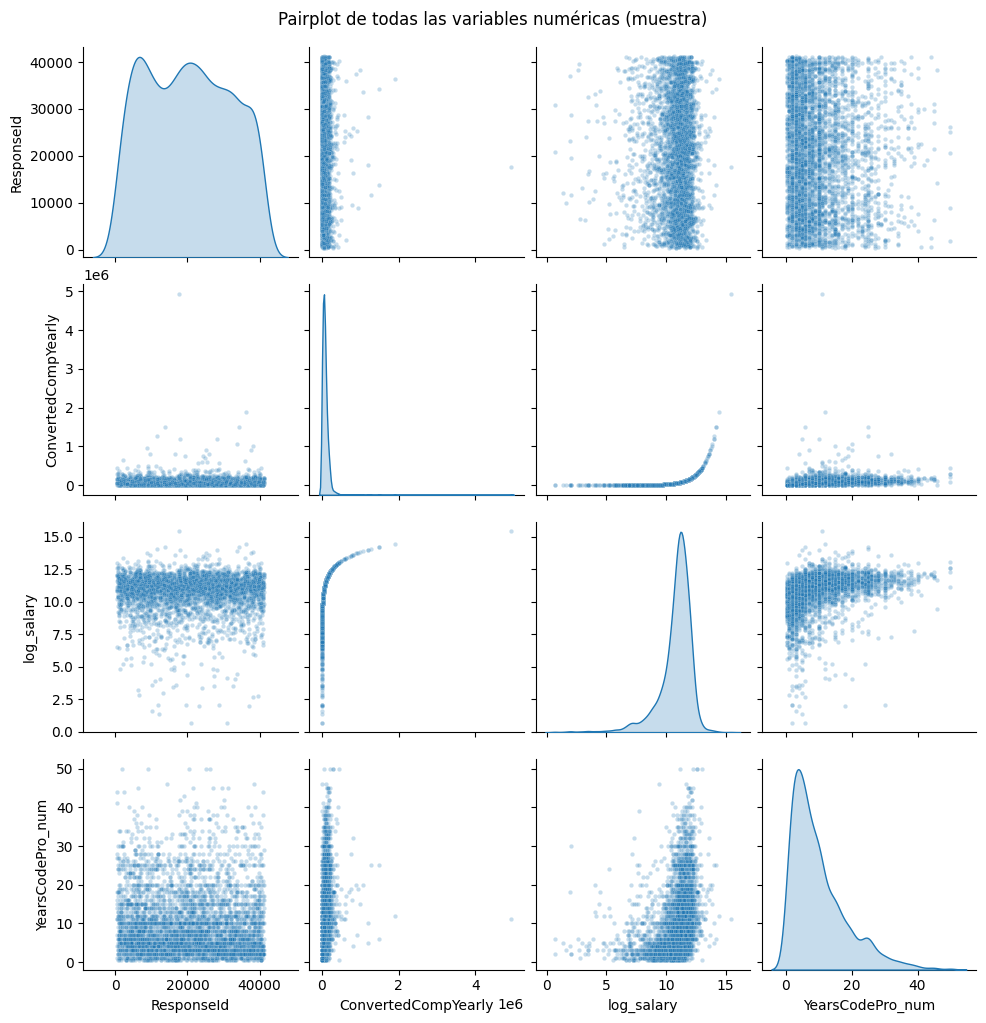

In [498]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar todas las columnas numéricas (incluye int/float; excluye objetos/categorías)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"Columnas numéricas detectadas: {len(num_cols)}")
print(num_cols)


MAX_MISSING = 0.80

keep = []
for c in num_cols:
    miss = df[c].isna().mean()
    if miss <= MAX_MISSING and df[c].nunique(dropna=True) > 1:
        keep.append(c)

num_cols = keep
print(f"Columnas numéricas tras filtros básicos: {len(num_cols)}")

N_SAMPLE = 4000
tmp = df[num_cols].dropna().sample(min(N_SAMPLE, df[num_cols].dropna().shape[0]), random_state=42)

print("Muestra usada:", tmp.shape)

sns.pairplot(tmp, diag_kind="kde", plot_kws={"s": 10, "alpha": 0.25})
plt.suptitle("Pairplot de todas las variables numéricas (muestra)", y=1.02)
plt.show()


En el pairplot aparecen cuatro variables numéricas principales:

- `ConvertedCompYearly` (salario anual crudo)
- `log_salary` (transformación logarítmica del salario)
- `YearsCodePro_num` (años de experiencia profesional)
- `ResponseId` (identificador de respuesta) (no relevante para el análisis)


##### `ConvertedCompYearly` muestra un comportamiento altamente asimétrico (cola larga)
La diagonal de `ConvertedCompYearly` confirma lo ya discutido:  
la distribución del salario crudo tiene una **cola extremadamente larga**, con muchos valores concentrados cerca de cero y pocos valores muy grandes.

Además, en los scatterplots donde aparece `ConvertedCompYearly`, se observa que:
- la mayoría de puntos quedan “aplastados” cerca de la base,
- y unos pocos valores extremos dominan la escala.

Esto refuerza por qué `ConvertedCompYearly` no es cómodo para análisis estadístico directo y justifica nuevamente por qué usamos y usaremos `log_salary` como variable objetivo en inferencia y modelado.

##### `YearsCodePro_num` vs `log_salary`: relación positiva clara (pero con dispersión)
La relación más informativa del pairplot aparece entre:

$$
\text{YearsCodePro\_num} \quad \text{y} \quad \text{log\_salary}
$$

Se observa una tendencia general que tiene bastante sentido:

- a mayor experiencia profesional, mayor salario en promedio,
- pero con mucha dispersión (hay salarios variados incluso con la misma experiencia).


 **la experiencia es un factor fuerte asociado con el salario**, y por tanto es un candidato natural a variable de control.

En otras palabras, si una modalidad de trabajo (por ejemplo Remote) tiene mayor proporción de participantes con alta experiencia, entonces una comparación directa por modalidad (como en RQ1) podría estar capturando parcialmente ese efecto.

### El pairplot deja claro una idea central que ya intuiamos: el salario no depende solo de la modalidad.  

Hay variables numéricas (como experiencia) que muestran relación clara con el salario y podrían explicar parte del patrón observado en RQ1.

Pero todavía falta incorporar otras variables no numéricas muy relevantes para salarios, como:

- `Country` (diferencias salariales por contexto económico),
- `EdLevel` (educación),
- `DevType` (rol / especialización).

Esto nos lleva naturalmente al siguiente paso:

> explorar cómo cambian salario y modalidad cuando introducimos estas variables categóricas,  
> para entender si Remote/Hybrid están asociados a ciertos países, niveles de experiencia o roles específicos.

A continuacion exploraremos cual es la relacion real entre modalidad de trabajo y salario, principalmente con el objetivo de analizar si se mantiene o no la diferencia salarial entre  modalidades al controlar por país, experiencia, educación y rol, esta se convierte por tanto, en la segunda pregunta a la que daremos respuesta en nuestra investigación.


## RQ2 — Modalidad de trabajo y salario (análisis ajustado)

**Pregunta de investigación (RQ2):**  
¿Se mantien una asociación entre la modalidad de trabajo (**In-person / Hybrid / Remote**) y el salario, una vez que ajustamos por variables observables como experiencia, educación, rol y país?

**Objetivo del análisis:**  
Estimar diferencias promedio condicionales en el salario (usando `log_salary`) entre modalidades de trabajo.  
Este análisis se interpreta como **asociación ajustada**, **no como efecto causal**, porque puede existir selección (p.ej., quién puede acceder a remoto) y factores no observados que también afectan salario.


In [499]:
# Imports + Carga del dataset procesado + shape original
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot

from IPython.display import display

from statsmodels.stats.diagnostic import het_breuschpagan, het_white


# ---- Tablas cruzadas para ver soporte por país/rol vs modalidad ----
RW_HYB = "Hybrid (some remote, some in-person)"
RW_INP = "In-person"
RW_REM = "Remote"

DATA_PATH = "../data/processed/df_final_v1.csv"
df = pd.read_csv(DATA_PATH)

print("Shape original (processed):", df.shape)

df.columns


Shape original (processed): (65437, 20)


Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'RemoteWork',
       'ConvertedCompYearly', 'YearsCodePro', 'YearsCode', 'DevType',
       'EdLevel', 'Age', 'OrgSize', 'LanguageHaveWorkedWith',
       'DatabaseHaveWorkedWith', 'WebframeHaveWorkedWith',
       'PlatformHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'has_salary',
       'log_salary', 'YearsCodePro_num'],
      dtype='object')

In [500]:
# Filtro por has_salary (salario reportado)
df_rq2 = df[df["has_salary"]].copy()
print("Shape tras filtrar por los que reportaron salario:", df_rq2.shape)

# Para RQ2 necesitamos RemoteWork (modalidad). Creamos una versión sin NA en RemoteWork.
df_rq2 = df_rq2[df_rq2["RemoteWork"].notna()].copy()
print("Shape con salario y modalidad de trabajo no nulo:", df_rq2.shape)


Shape tras filtrar por los que reportaron salario: (23435, 20)
Shape con salario y modalidad de trabajo no nulo: (23427, 20)


In [501]:
# Diagnóstico de variables con muy pocos registros 

country_counts = df_rq2["Country"].value_counts()
print("\nPaíses menos frecuentes:")
display(country_counts.tail(10))

dev_counts = df_rq2["DevType"].value_counts()
print("\nRoles menos frecuentes:")
display(dev_counts.tail(10))

ed_counts = df_rq2["EdLevel"].value_counts()
print("\nNiveles educativos menos frecuentes:")
display(ed_counts.tail(10))

# Experiencia (YearsCodePro_num) es numérica: la binned para ver zonas con pocos casos ----
exp_bins = pd.cut(df_rq2["YearsCodePro_num"], bins=[-0.01, 0.5, 1, 3, 5, 10, 20, 30, 40, 60])
exp_bin_counts = exp_bins.value_counts().sort_index()
print("\nDistribución de experiencia (binned):")
display(exp_bin_counts)

ct_country = pd.crosstab(df_rq2["Country"], df_rq2["RemoteWork"])
for col in [RW_HYB, RW_INP, RW_REM]:
    if col not in ct_country.columns:
        ct_country[col] = 0
ct_country["total"] = ct_country[[RW_HYB, RW_INP, RW_REM]].sum(axis=1)
ct_country["n_modalities_present"] = (ct_country[[RW_HYB, RW_INP, RW_REM]] > 0).sum(axis=1)

print("\n¿Cuántos países tienen 1/2/3 modalidades presentes?")
display(ct_country["n_modalities_present"].value_counts().sort_index())



Países menos frecuentes:


Country
Oman                        1
Central African Republic    1
Samoa                       1
Antigua and Barbuda         1
Lesotho                     1
Brunei Darussalam           1
Burundi                     1
Barbados                    1
Mali                        1
Haiti                       1
Name: count, dtype: int64


Roles menos frecuentes:


DevType
Security professional              113
Educator                           108
Blockchain                          92
Developer Experience                88
Product manager                     87
Hardware Engineer                   65
Database administrator              59
Developer Advocate                  52
Designer                            44
Marketing or sales professional     17
Name: count, dtype: int64


Niveles educativos menos frecuentes:


EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          10363
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        6827
Some college/university study without earning a degree                                 2793
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     1184
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         1155
Associate degree (A.A., A.S., etc.)                                                     749
Something else                                                                          209
Primary/elementary school                                                               147
Name: count, dtype: int64


Distribución de experiencia (binned):


YearsCodePro_num
(-0.01, 0.5]     657
(0.5, 1.0]       971
(1.0, 3.0]      3741
(3.0, 5.0]      3312
(5.0, 10.0]     6305
(10.0, 20.0]    5481
(20.0, 30.0]    2124
(30.0, 40.0]     622
(40.0, 60.0]     124
Name: count, dtype: int64


¿Cuántos países tienen 1/2/3 modalidades presentes?


n_modalities_present
1     25
2     27
3    114
Name: count, dtype: int64

### Países con muy pocos registros
Controlar por país implica que el modelo aprenderá un “nivel base” salarial para cada país.  
Si incluimos países con muy pocos registros o con ausencia de alguna modalidad (por ejemplo, 0 personas In-person), el modelo puede volverse **inestable** debido a que no hay suficiente información para separar “efecto país” vs “efecto modalidad”.

Por eso, antes de modelar, definimos un criterio de **soporte mínimo** por país:
- un mínimo de observaciones totales (`MIN_TOTAL`),
- un mínimo de observaciones **In-person** (`MIN_INPERSON`) para asegurar comparabilidad,
- y presencia de las 3 modalidades.


In [502]:
# Construcción del subdataset oficial (países “buenos” + columnas de interés)

MIN_TOTAL = 100
MIN_INPERSON = 20

ct_country_sorted = ct_country.sort_values("total", ascending=False)

good_countries = ct_country_sorted[
    (ct_country_sorted["total"] >= MIN_TOTAL) &
    (ct_country_sorted[RW_INP] >= MIN_INPERSON) &
    (ct_country_sorted["n_modalities_present"] == 3)
].index

cols_interest = [
    "Country", "RemoteWork", "EdLevel", "DevType",
    "YearsCodePro_num", "log_salary", "ConvertedCompYearly", "has_salary"
]

df_rq2_official = (
    df_rq2[df_rq2["Country"].isin(good_countries)]
    [cols_interest]
    .copy()
)

print("Países retenidos:", len(good_countries))
print("Filas antes:", len(df_rq2))
print("Filas después (subdataset oficial):", len(df_rq2_official))

df_rq2 = df_rq2_official


Países retenidos: 32
Filas antes: 23427
Filas después (subdataset oficial): 19932


In [503]:
df_tmp = df_rq2.copy()

# NO incluimos NaN como categoría de DevType para evitar problemas de indexado y rare_roles.
n_dev_nan = df_tmp["DevType"].isna().sum()
print(f"DevType NaN (faltantes): {n_dev_nan} ({n_dev_nan/len(df_tmp):.2%})")

# Conteos de roles no nulos
dev_counts = df_tmp.loc[df_tmp["DevType"].notna(), "DevType"].value_counts()

print("\nTop 10 roles más frecuentes:")
display(dev_counts.head(10))

print("\nBottom 15 roles menos frecuentes (sin NaN):")
display(dev_counts.tail(15))

ct_dev = pd.crosstab(df_tmp.loc[df_tmp["DevType"].notna(), "DevType"],
                     df_tmp.loc[df_tmp["DevType"].notna(), "RemoteWork"])

for col in [RW_HYB, RW_INP, RW_REM]:
    if col not in ct_dev.columns:
        ct_dev[col] = 0

ct_dev["total"] = ct_dev[[RW_HYB, RW_INP, RW_REM]].sum(axis=1)

# Porcentajes por rol (fila)
ct_dev_pct = ct_dev[[RW_HYB, RW_INP, RW_REM]].div(ct_dev["total"], axis=0)

# Selecciona roles raros (umbral ajustable)
MIN_DEVTYPE = 50
rare_roles = dev_counts[dev_counts < MIN_DEVTYPE].index.tolist()

print(f"\nUmbral de rareza = {MIN_DEVTYPE}")
print(f"Número de roles raros: {len(rare_roles)}")
print("Ejemplos de roles raros:", rare_roles[:5])

ct_rare = ct_dev.reindex(rare_roles).dropna(how="all").sort_values("total", ascending=True)

print("\nCrosstab (conteos) para roles raros:")
display(ct_rare[[RW_INP, RW_HYB, RW_REM, "total"]].head(20))

print("\nCrosstab (porcentajes por rol) para roles raros:")
display(ct_dev_pct.reindex(ct_rare.index).head(20))

df_rq2 = df_tmp


DevType NaN (faltantes): 28 (0.14%)

Top 10 roles más frecuentes:


DevType
Developer, full-stack                            6972
Developer, back-end                              3994
Developer, front-end                             1129
Developer, desktop or enterprise applications     923
Developer, embedded applications or devices       694
Developer, mobile                                 657
Other (please specify):                           574
Data engineer                                     497
Engineering manager                               465
DevOps specialist                                 427
Name: count, dtype: int64


Bottom 15 roles menos frecuentes (sin NaN):


DevType
System administrator               148
Student                            129
Scientist                          115
Engineer, site reliability         111
Project manager                    103
Security professional              103
Educator                           101
Developer Experience                77
Product manager                     70
Blockchain                          62
Hardware Engineer                   58
Database administrator              50
Developer Advocate                  48
Designer                            38
Marketing or sales professional     13
Name: count, dtype: int64


Umbral de rareza = 50
Número de roles raros: 3
Ejemplos de roles raros: ['Developer Advocate', 'Designer', 'Marketing or sales professional']

Crosstab (conteos) para roles raros:


RemoteWork,In-person,"Hybrid (some remote, some in-person)",Remote,total
DevType,,,,
Marketing or sales professional,3,8,2,13
Designer,9,17,12,38
Developer Advocate,3,11,34,48



Crosstab (porcentajes por rol) para roles raros:


RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
DevType,,,
Marketing or sales professional,0.615385,0.230769,0.153846
Designer,0.447368,0.236842,0.315789
Developer Advocate,0.229167,0.062500,0.708333


## Caso `DevType` (roles con pocos datos)

Al inspeccionar `DevType` se observa una distribución desbalanceada: algunos roles tienen miles de observaciones, mientras que otros aparecen con **muy pocos casos** (por ejemplo, *Marketing or sales professional* con 17). Esto importa por dos razones:

1. **Dummies muy escasas ⇒ estimaciones inestables.**  
   Un rol con muy pocas observaciones genera coeficientes y errores estándar altamente ruidosos. En ese contexto, la “no significancia” de una dummy individual suele reflejar **falta de soporte**, no necesariamente ausencia de relación.

2. **Celdas raras pueden inducir leverage/influencia.**  
   En modelos con múltiples variables categóricas (educación, rol, país) como los que presentaremos más adelante, categorías raras aumentan el riesgo de combinaciones poco frecuentes, lo que puede producir observaciones con leverage alto y volver más frágil la inferencia.

### ¿Por qué no filtramos (eliminamos) observaciones por `DevType`?
A diferencia del filtrado por `Country` (que se justifica por **soporte e identificación** al comparar modalidades dentro de país cuando se usan efectos fijos), filtrar por rol implicaría **eliminar personas** y podría introducir sesgos si esos roles tienen perfiles distintos (salario, experiencia, modalidad).

### Decisión: agrupar roles raros dentro de “Other”
El dataset ya incluye una categoría `Other (please specify):`. Para evitar crear una etiqueta adicional y mantener interpretabilidad:

- Renombramos `Other (please specify):` a **`Other`**.
- Reagrupamos roles con baja frecuencia (bajo un umbral `MIN_DEVTYPE`) dentro de **`Other`**.

Esto mejora la **estabilidad del diseño** (menos dummies extremadamente escasas) sin perder tamaño muestral por la recodificación.  
Finalmente, reportamos cuántas observaciones quedan como `Other` y cuántas se pierden al hacer `dropna` sobre esta variable.


In [504]:
df_rq2_devgroup = df_rq2.copy()

# Normalizar el "Other" existente directamente sobre una serie temporal
OTHER_RAW = "Other (please specify):"
OTHER_STD = "Other"

dev_series = df_rq2_devgroup["DevType"].replace({OTHER_RAW: OTHER_STD})

# Definir rare_roles sobre DevType no nulo (ya normalizado)
dev_counts = dev_series.dropna().value_counts()
rare_roles = set(dev_counts[dev_counts < MIN_DEVTYPE].index)
rare_roles.discard(OTHER_STD)  # no “mandar Other a Other” por conteo

# Crear DevType agrupado y quedarnos solo con ese como columna final "DevType"
df_rq2_devgroup["DevType"] = dev_series.where(~dev_series.isin(rare_roles), other=OTHER_STD)

# recodificación NO debería cambiar filas
print("\nShape antes (df_tmp):", df_rq2.shape)
print("Shape después de recodificar (sin filtrar NaN):", df_rq2_devgroup.shape)
lost_by_recode = df_tmp.shape[0] - df_rq2_devgroup.shape[0]
print(f"Filas perdidas por recodificación: {lost_by_recode} (esperado: 0)")

# filtrar por DevType no nulo 
before_dropna = df_rq2_devgroup.shape[0]
df_rq2_devgroup = df_rq2_devgroup[df_rq2_devgroup["DevType"].notna()].copy()
after_dropna = df_rq2_devgroup.shape[0]
lost_by_dropna = before_dropna - after_dropna

print(f"\nFilas perdidas por filtrar DevType no nulo: {lost_by_dropna} "
      f"({lost_by_dropna/before_dropna:.2%} de la muestra previa al filtro)")

# ¿Cuántos quedaron en Other?
n_other = (df_rq2_devgroup["DevType"] == OTHER_STD).sum()
print(f"\nObservaciones en '{OTHER_STD}': {n_other} ({n_other/len(df_rq2_devgroup):.2%} de la muestra final)")

# Crosstab DevType × RemoteWork (conteos) para ver soporte final (incluye Other)
ct_group = pd.crosstab(df_rq2_devgroup["DevType"], df_rq2_devgroup["RemoteWork"])
for col in [RW_HYB, RW_INP, RW_REM]:
    if col not in ct_group.columns:
        ct_group[col] = 0
ct_group["total"] = ct_group[[RW_HYB, RW_INP, RW_REM]].sum(axis=1)

print("\nCrosstab DevType × RemoteWork (conteos) [DevType ya agrupado]:")
display(ct_group.sort_values("total", ascending=True).head(20))

df_rq2 = df_rq2_devgroup



Shape antes (df_tmp): (19932, 8)
Shape después de recodificar (sin filtrar NaN): (19932, 8)
Filas perdidas por recodificación: 0 (esperado: 0)

Filas perdidas por filtrar DevType no nulo: 28 (0.14% de la muestra previa al filtro)

Observaciones en 'Other': 673 (3.38% de la muestra final)

Crosstab DevType × RemoteWork (conteos) [DevType ya agrupado]:


RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote,total
DevType,,,,
Database administrator,17,10,23,50
Hardware Engineer,28,26,4,58
Blockchain,10,4,48,62
Product manager,35,16,19,70
Developer Experience,28,6,43,77
Educator,37,41,23,101
Project manager,47,23,33,103
Security professional,42,8,53,103
"Engineer, site reliability",47,14,50,111


,n,pct
RemoteWork,,
"Hybrid (some remote, some in-person)",8616,43.3
Remote,8138,40.9
In-person,3150,15.8


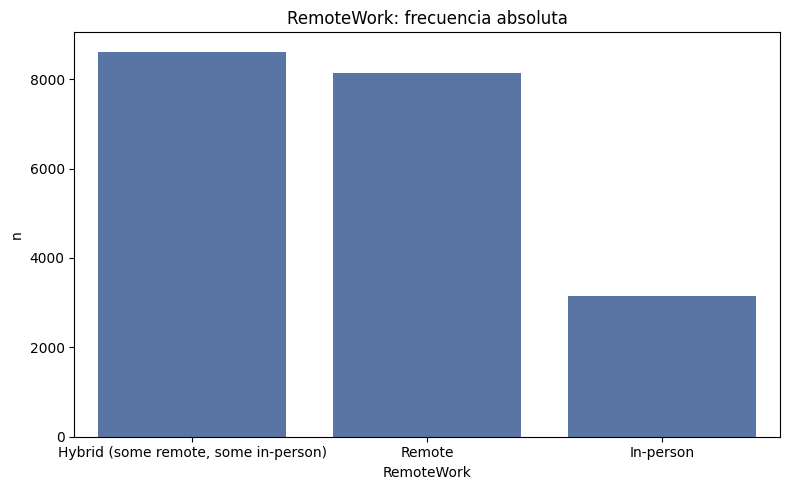

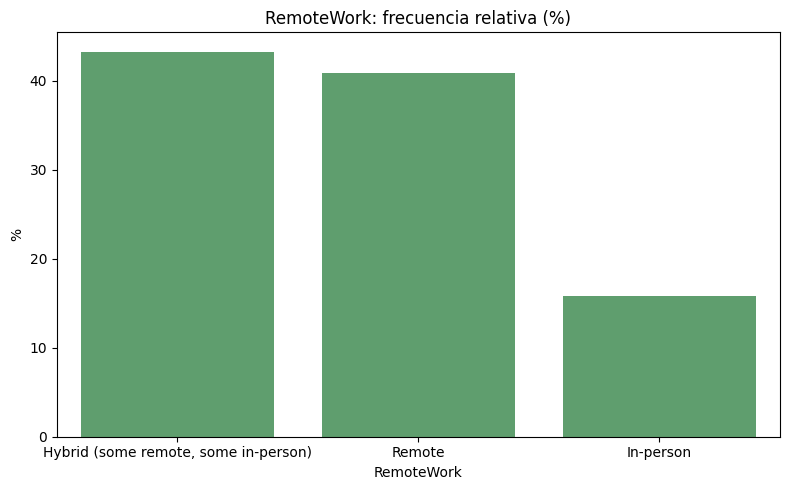

In [505]:
remote_counts = df_rq2["RemoteWork"].fillna("Missing").value_counts()
remote_share = remote_counts / remote_counts.sum()
display(pd.DataFrame({"n": remote_counts, "pct": (remote_share * 100).round(1)}))

plot_df = remote_counts.reset_index()
plot_df.columns = ["RemoteWork", "n"]
plot_df["pct"] = remote_share.loc[plot_df["RemoteWork"]].values * 100

plt.figure(figsize=(8, 5))
sns.barplot(data=plot_df, x="RemoteWork", y="n", color="#4c72b0")
plt.title("RemoteWork: frecuencia absoluta")
plt.xlabel("RemoteWork")
plt.ylabel("n")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=plot_df, x="RemoteWork", y="pct", color="#55a868")
plt.title("RemoteWork: frecuencia relativa (%)")
plt.xlabel("RemoteWork")
plt.ylabel("%")
plt.tight_layout()
plt.show()

## Consideración sobre desbalance entre modalidades de trabajo

La distribución por modalidad solo remarcar un **desbalance** claro que ya habíamos analizado en celdas anteriores (con menor proporción de observaciones en **In-person** respecto de **Remote** y **Hybrid**). Este punto es relevante para el análisis de RQ2 por tres razones:

1) **Precisión de la estimación**: un tamaño de muestra menor en el grupo de referencia (o en cualquier grupo) suele incrementar la varianza de los estimadores asociados a comparaciones entre grupos, lo que se refleja en **errores estándar más altos** y, por tanto, en intervalos de confianza más amplios.

2) **Soporte dentro de subgrupos (Country × RemoteWork)**: aun cuando el filtrado por país garantiza presencia mínima de modalidades, el desbalance puede persistir a nivel de país u otras particiones relevantes, generando **celdas con baja frecuencia**. Esto puede afectar la estabilidad numérica del ajuste al incorporar múltiples variables categóricas (educación, rol, país), y aumentar la probabilidad de observaciones con **alto leverage**.

3) **Implicaciones para inferencia**: en contextos con desbalance y combinación de categorías, es común observar **heterocedasticidad** y/o sensibilidad a observaciones influyentes. Por ello, es apropiado complementar el modelado con diagnósticos formales de supuestos y, de ser necesario, utilizar estimadores de varianza robustos para asegurar inferencia confiable.

En las secciones siguientes se verificará el soporte efectivo del subdataset utilizado para estimación y se evaluarán supuestos e influencia antes de fijar la estrategia de errores estándar.


In [506]:
# Dataset final que entra al modelo (post-dropna en variables del modelo)
model_cols = ["Country", "RemoteWork", "EdLevel", "DevType", "YearsCodePro_num", "log_salary"]
df_rq2_model = df_rq2.dropna(subset=model_cols).copy()

print("Dataset para modelar (post-dropna):", df_rq2_model.shape)


Dataset para modelar (post-dropna): (19839, 8)


## Modelo diagnóstico y chequeo de supuestos

Antes de pasar a la inferencia robusta, ajustamos un **modelo diagnóstico OLS** con errores estándar clásicos. La idea es usar este ajuste como **línea base** para evaluar supuestos y detectar posibles problemas que ya han sido sugeridos en análisis previos (heterocedasticidad, leverage/influencia) y que puedan afectar la inferencia.

**Especificación:** mantenemos la misma estructura del modelo principal y fijamos **In-person** como categoría de referencia en `RemoteWork` para facilitar la interpretación de los coeficientes.

**Pruebas y diagnósticos a correr:**
1) **Heterocedasticidad (Breusch–Pagan y White)**
   - H0: varianza de los residuos constante (homocedasticidad).
   - H1: varianza no constante (heterocedasticidad).
2) **Leverage e influencia** (hat values, Cook's distance, residuos ¨studentizados¨)
   - Buscamos observaciones con **alto leverage** o **influencia desproporcionada** que puedan distorsionar el ajuste.
3) **Comparación de SE clásicos vs. robustos (HC0–HC3)**
   - Para los coeficientes de `RemoteWork`, comparamos errores estándar y verificamos sensibilidad de la inferencia.



In [507]:

# Modelo "diagnóstico" (clásico, sin robust) para evaluar supuestos
# Treatment con referencia In-person para interpretabilidad.
rw_term = f"C(RemoteWork, Treatment(reference='{RW_INP}'))"
formula_diag = f"log_salary ~ {rw_term} + YearsCodePro_num + C(EdLevel) + C(DevType)"

m_diag = smf.ols(formula_diag, data=df_rq2_model).fit()

print("\n=== Modelo diagnóstico (SE clásicos) ===")
print("Fórmula:", formula_diag)
print(f"n = {int(m_diag.nobs)}, parámetros (incl. intercepto) ~ {int(m_diag.df_model) + 1}")

# Pruebas formales de heterocedasticidad (sobre residuos del modelo diagnóstico)
# H0 (BP): varianza constante condicional a X
# H0 (White): varianza constante sin especificar forma (más general)
exog = m_diag.model.exog
resid = m_diag.resid

bp_lm, bp_lm_pvalue, bp_f, bp_f_pvalue = het_breuschpagan(resid, exog)
w_lm, w_lm_pvalue, w_f, w_f_pvalue = het_white(resid, exog)

het_table = pd.DataFrame(
    {
        "Test": ["Breusch–Pagan (LM)", "Breusch–Pagan (F)", "White (LM)", "White (F)"],
        "Stat": [bp_lm, bp_f, w_lm, w_f],
        "p-value": [bp_lm_pvalue, bp_f_pvalue, w_lm_pvalue, w_f_pvalue],
    }
)

print("\n=== Tests de heterocedasticidad (sobre el modelo diagnóstico) ===")
display(het_table)

# Diagnóstico de leverage e influencia (para justificar HC3 vs HC0/HC1)
infl = m_diag.get_influence()
hat = infl.hat_matrix_diag                       # leverage h_ii
cooks = infl.cooks_distance[0]                   # Cook's distance
rstud = infl.resid_studentized_internal          # residuos studentizados

n = int(m_diag.nobs)
p = int(m_diag.df_model) + 1                     # parámetros incl. intercepto

thr_2 = 2 * p / n
thr_3 = 3 * p / n
thr_cook = 4 / n

leverage_summary = pd.DataFrame({
    "n": [n],
    "p_params": [p],
    "mean(h_ii)": [hat.mean()],
    "max(h_ii)": [hat.max()],
    "thr_high_lev_2p/n": [thr_2],
    "thr_high_lev_3p/n": [thr_3],
    "share(h_ii > 2p/n)": [(hat > thr_2).mean()],
    "share(h_ii > 3p/n)": [(hat > thr_3).mean()],
    "share(|rstudent| > 3)": [(np.abs(rstud) > 3).mean()],
    "share(CookD > 4/n)": [(cooks > thr_cook).mean()],
})

print("\n=== Diagnóstico de leverage / influencia (modelo diagnóstico) ===")
display(leverage_summary)

# Mostrar las observaciones más influyentes 
top_k = 10
top_influence = pd.DataFrame({
    "hat(h_ii)": hat,
    "CookD": cooks,
    "rstudent": rstud,
    "RemoteWork": df_rq2_model["RemoteWork"].values,
    "Country": df_rq2_model["Country"].values,
    "DevType": df_rq2_model["DevType"].values,
    "EdLevel": df_rq2_model["EdLevel"].values,
    "YearsCodePro_num": df_rq2_model["YearsCodePro_num"].values,
}).sort_values("CookD", ascending=False).head(top_k)

print(f"\nTop {top_k} observaciones por Cook's distance (potencial influencia):")
display(top_influence)

# 5) Comparación de inferencia para los coeficientes de RemoteWork: Clásico vs HC0–HC3
rw_coefs = [k for k in m_diag.params.index if "RemoteWork" in k]
if len(rw_coefs) == 0:
    print("\n[Advertencia] No se encontraron coeficientes de RemoteWork en el modelo. Revisa categorías o fórmula.")
else:
    def extract_coef_table(res, label):
        # Robust results can return numpy arrays; align by parameter names first.
        param_names = list(getattr(getattr(res, "model", None), "exog_names", []) or [])
        if not param_names and hasattr(res.params, "index"):
            param_names = list(res.params.index)
        if not param_names:
            param_names = list(range(len(res.params)))

        if hasattr(res.params, "index"):
            params = res.params
            bse = res.bse
            tvalues = res.tvalues
            pvalues = res.pvalues
        else:
            params = pd.Series(res.params, index=param_names)
            bse = pd.Series(res.bse, index=param_names)
            tvalues = pd.Series(res.tvalues, index=param_names)
            pvalues = pd.Series(res.pvalues, index=param_names)

        out = pd.DataFrame({
            "coef": params.loc[rw_coefs],
            "se": bse.loc[rw_coefs],
            "t": tvalues.loc[rw_coefs],
            "p": pvalues.loc[rw_coefs],
        })
        out["cov_type"] = label
        return out.reset_index().rename(columns={"index": "term"})

    tables = [extract_coef_table(m_diag, "Classical")]
    for cov in ["HC0", "HC1", "HC2", "HC3"]:
        tables.append(extract_coef_table(m_diag.get_robustcov_results(cov_type=cov), cov))

    se_compare = pd.concat(tables, ignore_index=True)

    # Pivot para comparar SE de forma clara
    se_pivot = se_compare.pivot_table(index="term", columns="cov_type", values="se")
    se_pivot["HC3/HC1"] = se_pivot["HC3"] / se_pivot["HC1"]
    se_pivot["HC3/Classical"] = se_pivot["HC3"] / se_pivot["Classical"]

    print("\n=== Comparación de errores estándar (coeficientes RemoteWork) ===")
    display(se_pivot)



=== Modelo diagnóstico (SE clásicos) ===
Fórmula: log_salary ~ C(RemoteWork, Treatment(reference='In-person')) + YearsCodePro_num + C(EdLevel) + C(DevType)
n = 19839, parámetros (incl. intercepto) ~ 41

=== Tests de heterocedasticidad (sobre el modelo diagnóstico) ===


,Test,Stat,p-value
0,Breusch–Pagan (LM),294.066556,1.993699e-40
1,Breusch–Pagan (F),7.446853,8.811968e-41
2,White (LM),833.962572,2.000858e-43
3,White (F),2.516454,8.340196e-45



=== Diagnóstico de leverage / influencia (modelo diagnóstico) ===


,n,p_params,mean(h_ii),max(h_ii),thr_high_lev_2p/n,thr_high_lev_3p/n,share(h_ii > 2p/n),share(h_ii > 3p/n),share(|rstudent| > 3),share(CookD > 4/n)
0,19839,41,0.002067,0.024238,0.004133,0.0062,0.127123,0.077524,0.021271,0.044004



Top 10 observaciones por Cook's distance (potencial influencia):


,hat(h_ii),CookD,rstudent,RemoteWork,Country,DevType,EdLevel,YearsCodePro_num
16825,0.009886,0.019375,-8.919734,"Hybrid (some remote, some in-person)",Indonesia,Security professional,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",15.0
5540,0.014518,0.012712,-5.947889,In-person,India,Data or business analyst,Primary/elementary school,2.0
593,0.007110,0.010306,-7.681815,"Hybrid (some remote, some in-person)",United States of America,"Developer, game or graphics","Associate degree (A.A., A.S., etc.)",11.0
15223,0.005901,0.010279,-8.425793,"Hybrid (some remote, some in-person)",United States of America,Data or business analyst,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2.0
9516,0.007125,0.009853,-7.502706,In-person,United States of America,System administrator,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20.0
7629,0.008289,0.007731,-6.158161,Remote,India,Student,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1.0
3292,0.008240,0.007407,-6.045545,Remote,Australia,System administrator,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",35.0
13468,0.009804,0.007165,-5.446899,Remote,Ukraine,"Developer, desktop or enterprise applications",Primary/elementary school,3.0
5382,0.008823,0.006022,-5.266671,Remote,Ukraine,"Developer, back-end",Primary/elementary school,6.0
15002,0.006819,0.005866,-5.918467,"Hybrid (some remote, some in-person)",Israel,Data or business analyst,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",3.0



=== Comparación de errores estándar (coeficientes RemoteWork) ===


cov_type,Classical,HC0,HC1,HC2,HC3,HC3/HC1,HC3/Classical
term,,,,,,,
"C(RemoteWork, Treatment(reference='In-person'))[T.Hybrid (some remote, some in-person)]",0.024930,0.025373,0.025399,0.025404,0.025436,1.001477,1.020320
"C(RemoteWork, Treatment(reference='In-person'))[T.Remote]",0.025639,0.027786,0.027815,0.027819,0.027852,1.001318,1.086313


### Evidencia formal de heterocedasticidad
Se aplicaron pruebas estándar sobre los residuos del modelo diagnóstico:

- **Breusch–Pagan (LM):** $p = 1.99\times10^{-40}$  
- **Breusch–Pagan (F):** $p = 8.81\times10^{-41}$  
- **White (LM):** $p = 2.00\times10^{-43}$  
- **White (F):** $p = 8.34\times10^{-45}$

En todos los casos, los p-values son extremadamente pequeños, por lo que se **rechaza** la hipótesis nula de homocedasticidad. Esto implica que los **errores estándar clásicos son inconsistentes** bajo esta evidencia, y por tanto los t-tests e intervalos de confianza basados en ellos pueden ser engañosos. En consecuencia, la inferencia debe basarse en estimadores de varianza **robustos a heterocedasticidad**.

### Evidencia de leverage / influencia (relevante para escoger HC3)
Además, se evaluó la estructura de leverage e influencia:

- Promedio de leverage: $\overline{h_{ii}} = 0.002067$ (consistente con $p/n$)  
- Máximo de leverage: $\max(h_{ii}) = 0.024238$  
- Umbrales heurísticos:
  - $2p/n = 0.004133$
  - $3p/n = 0.0062$
- Proporciones:
  - $\Pr(h_{ii} > 2p/n) = 12.7\%$
  - $\Pr(h_{ii} > 3p/n) = 7.75\%$
  - $\Pr(|r_{\text{student}}| > 3) = 2.13\%$
  - $\Pr(\text{CookD} > 4/n) = 4.40\%$

Estos resultados son consistentes con un diseño que incluye múltiples variables categóricas (dummies), donde algunas combinaciones pueden ser raras y generar **observaciones con leverage relativamente alto**. En este contexto, es razonable preferir un estimador robusto que sea más conservador frente a leverage.

### Comparación práctica: SE clásicos vs HC0–HC3 en los coeficientes clave (RemoteWork)
La evidencia empírica muestra que los errores estándar robustos pueden ser mayores que los clásicos, particularmente para el término **Remote**:

- Para **Hybrid**: $SE_{HC3} / SE_{\text{clásico}} \approx 1.02$ (+2.0%)  
- Para **Remote**: $SE_{HC3} / SE_{\text{clásico}} \approx 1.086$ (+8.6%)

Esto confirma que la heterocedasticidad afecta materialmente la inferencia (sobre todo para Remote), y que usar SE clásicos sería optimista.

Entre robustos, la diferencia entre **HC3 y HC1** en los términos de RemoteWork es pequeña:

- $SE_{HC3} / SE_{HC1} \approx 1.0013$–$1.0015$

Lo anterior sugiere que, para los coeficientes de interés, la inferencia es **estable** dentro de la familia HC. Aun así, se adopta **HC3 como especificación principal** por ser más conservador frente a leverage y por ser una elección estándar recomendable cuando existen señales de observaciones con leverage no trivial en un modelo con dummies.


## Importancia de (`log_salary`) y elección de OLS

### Motivación de `log_salary`
En análisis anteriores vimos que los salarios presentan **asimetría positiva** y mecanismos de variación más cercanos a efectos **multiplicativos** (porcentajes) que aditivos. La transformación logarítmica se vuelve imprescindible porque:

1) **Reduce asimetría y atenúa valores extremos**, facilitando relaciones aproximadamente lineales con covariables.  
2) Permite una **interpretación económica natural**: en un modelo log-lineal, los coeficientes se interpretan como diferencias porcentuales aproximadas. Para una dummy con coeficiente $\beta$, el efecto exacto se expresa como:

$
100\cdot(\exp(\beta)-1)\%
$

Esta interpretación es especialmente útil para comparar modalidades de trabajo (Remote/Hybrid/In-person) en términos relativos.

**Nota:** La transformación logarítmica, aunque estabiliza parcialmente la varianza, hemos visto que no garantiza homocedasticidad, lo cual refuerza la necesidad de errores estándar robustos.

### Por qué OLS
Se utiliza OLS para estimar **diferencias promedio condicionales** en $\log(\text{salary})$ entre modalidades, controlando por experiencia, educación y rol (y posteriormente, en modelos ampliados, por país). En términos de expectativa condicional:

$
E[\log(\text{salary})\mid X] = X\beta
$

El objetivo es cuantificar asociaciones ajustadas entre modalidad y salario, manteniendo constantes covariables observables. Este enfoque **no se interpreta como causal**: pueden persistir fuentes de selección (p.ej., industria/empresa, seniority no capturado completamente, o auto-selección a remoto). Por ello, el análisis se reporta como **asociación ajustada**, complementado con diagnósticos y estrategia de inferencia robusta.


## Modelos (M0–M3)

El objetivo es estimar la asociación entre modalidad de trabajo y salario (en escala logarítmica), construyendo el modelo de forma incremental para evaluar **estabilidad** de los coeficientes de interés y reducir potencial **confusión** por variables observables. En particular, se estima una secuencia de modelos anidados donde cada bloque añadido controla por dimensiones relevantes de composición muestral:

- **M0 (asociación cruda):** captura diferencias promedio sin controles.
- **M1 (+ experiencia):** incorpora $\text{YearsCodePro}$, dado que la modalidad de trabajo está fuertemente relacionada con experiencia.
- **M2 (+ educación y rol):** añade $C(\text{EdLevel})$ y $C(\text{DevType})$ para ajustar por diferencias sistemáticas en formación y ocupación.
- **M3 (+ país):** añade $C(\text{Country})$ para comparar modalidades **dentro de país**, controlando heterogeneidad entre mercados laborales nacionales.

En todos los modelos se reportan **errores estándar robustos HC3**, conforme a la evidencia diagnóstica de heterocedasticidad y a la presencia de leverage/influencia no trivial en un diseño con múltiples variables categóricas.


In [508]:
# Función para resumir solo el efecto de RemoteWork
def remote_effects(model):
    coefs = model.params.filter(like="RemoteWork")
    ci = model.conf_int().loc[coefs.index]
    out = pd.DataFrame({
        "beta_log": coefs,
        "pct_effect": 100*(np.exp(coefs)-1),
        "ci_low_pct": 100*(np.exp(ci[0])-1),
        "ci_high_pct": 100*(np.exp(ci[1])-1),
        "p_value": model.pvalues.loc[coefs.index]
    })
    return out

In [509]:
# Modelo M0 + tabla remote_effects
import statsmodels.formula.api as smf

RW_INP = "In-person"
rw_term = f'C(RemoteWork, Treatment(reference="{RW_INP}"))'

m0 = smf.ols(
    f"log_salary ~ {rw_term}",
    data=df_rq2_model
).fit(cov_type="HC3")


print(m0.summary())
display(remote_effects(m0))


                            OLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 11 Jan 2026   Prob (F-statistic):           3.27e-68
Time:                        18:35:13   Log-Likelihood:                -32880.
No. Observations:               19839   AIC:                         6.577e+04
Df Residuals:                   19836   BIC:                         6.579e+04
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                                                                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------

,beta_log,pct_effect,ci_low_pct,ci_high_pct,p_value
"C(RemoteWork, Treatment(reference=""In-person""))[T.Hybrid (some remote, some in-person)]",0.464997,59.200976,50.955351,67.897000,7.922359e-66
"C(RemoteWork, Treatment(reference=""In-person""))[T.Remote]",0.459535,58.333799,49.612751,67.563203,6.599653e-57


### Análisis de M0 (modelo crudo)

En **M0** la única variable explicativa es `RemoteWork`, usando **In-person** como categoría de referencia.
Este modelo sirve como **línea base**: cuantifica la diferencia promedio de salario entre modalidades **sin** controlar por país, experiencia, educación o rol.

---

#### Interpretación de los coeficientes (Hybrid/Remote vs In-person)

El modelo tiene la forma:


$$
\begin{aligned}
\mathrm{log\_salary} &= \beta_0 + \beta_H \, \mathbb{1}(\mathrm{Hybrid}) + \beta_R \, \mathbb{1}(\mathrm{Remote}) + \varepsilon
\end{aligned}
$$


- **Intercept (β₀ = 10.5305)**: representa el **promedio de `log_salary`** para el grupo **In-person** (categoría base).
- **βH (Hybrid vs In-person = 0.4650)**: diferencia promedio en `log_salary` entre **Hybrid** e **In-person**.
- **βR (Remote vs In-person = 0.4595)**: diferencia promedio en `log_salary` entre **Remote** e **In-person**.

Como `log_salary = log(1 + salario)`, es más interpretable expresar los coeficientes como cambios porcentuales aproximados:

$$
\%\Delta \approx 100 \, (e^{\beta} - 1)
$$

Con tus resultados (`remote_effects(M0)`):

- **Hybrid vs In-person**:  
  - β = **0.464997** → **+59.20%**  
  - IC95%: **[+50.96%, +67.90%]**  
  - p-value: **7.92e-66**
- **Remote vs In-person**:  
  - β = **0.459535** → **+58.33%**  
  - IC95%: **[+49.61%, +67.56%]**  
  - p-value: **6.60e-57**

En el análisis crudo, **Hybrid y Remote se asocian con salarios ~58-59% mayores** que In-person (en promedio), y la evidencia estadística es muy fuerte (p-values extremadamente pequeños).

Un detalle adicional: los coeficientes de **Hybrid** y **Remote** son casi iguales en M0 (≈0.465 vs ≈0.460), lo que sugiere que en la muestra cruda ambos grupos tienen un nivel promedio de `log_salary` **muy similar** entre sí, y ambos están por encima de In-person.

---

Reafirmamos que este modelo es **unadjusted**: no incluye controles por `Country`, `YearsCodePro_num`, `EdLevel` ni `DevType`. Por tanto,aun no podemos concluir que el trabajo remoto/híbrido **cause** un mayor salario ya que la diferencia puede estar parcialmente explicada por **confusión** (p. ej., distintos países, distintos roles, distinta experiencia).

Esto también se refleja en el **R² = 0.017**: `RemoteWork` por sí sola explica una parte pequeña de la variabilidad del salario, lo cual es esperable en datos salariales (hay muchos factores adicionales relevantes).


In [510]:
# Modelo M1 (añadiendo experiencia) + remote_effects
m1 = smf.ols(
    f"log_salary ~ {rw_term} + YearsCodePro_num",
    data=df_rq2_model
).fit(cov_type="HC3")

print(m1.summary())
display(remote_effects(m1))

                            OLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     1025.
Date:                Sun, 11 Jan 2026   Prob (F-statistic):               0.00
Time:                        18:35:14   Log-Likelihood:                -31749.
No. Observations:               19839   AIC:                         6.351e+04
Df Residuals:                   19835   BIC:                         6.354e+04
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                                                                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------

,beta_log,pct_effect,ci_low_pct,ci_high_pct,p_value
"C(RemoteWork, Treatment(reference=""In-person""))[T.Hybrid (some remote, some in-person)]",0.375870,45.625778,38.503175,53.114666,7.398372e-49
"C(RemoteWork, Treatment(reference=""In-person""))[T.Remote]",0.289351,33.556059,26.523989,40.978963,1.014311e-25


### Análisis de M1

En **M1** extendemos el modelo crudo (M0) añadiendo **experiencia profesional** (`YearsCodePro_num`) como covariable numérica. La especificación es:

$$
\mathrm{log\_salary} \sim \mathrm{RemoteWork} + \mathrm{YearsCodePro\_num}
$$

donde se mantiene `RemoteWork` como variable categórica con **In-person** como referencia.

---

#### ¿Cuánto cambia el efecto de RemoteWork al controlar por experiencia?

Comparando M0 (sin controles) con M1 (controlando por experiencia), el “premium” asociado a `RemoteWork` se reduce de forma clara:

- **Hybrid vs In-person**
  - M0: **+59.20%** (IC95%: 50.96%–67.90%)
  - M1: **+45.63%** (IC95%: 38.50%–53.11%)

- **Remote vs In-person**
  - M0: **+58.33%** (IC95%: 49.61%–67.56%)
  - M1: **+33.56%** (IC95%: 26.52%–40.98%)

**Interpretación:** al incluir experiencia, parte de la diferencia cruda entre modalidades se “absorbe” por `YearsCodePro_num`. Esto indica que los grupos (Remote/Hybrid/In-person) no tienen la misma distribución de experiencia y que la experiencia está correlacionada con el salario. En otras palabras, una fracción del efecto observado en M0 era **confusión por experiencia**.

Aun así, en M1 los efectos de `RemoteWork` permanecen:
- **positivos**,
- con **IC95% completamente por encima de 0**, y
- con **p-values extremadamente pequeños**,

lo que sugiere que incluso comparando personas con niveles similares de experiencia (en promedio), `RemoteWork` sigue asociado a mayores salarios respecto a In-person.

---

#### Interpretación del coeficiente de `YearsCodePro_num`

En el `summary()` de M1, el coeficiente estimado para `YearsCodePro_num` es:

- **β = 0.0479** (en escala `log_salary`), con p ≪ 0.001.

Como la variable dependiente está en log, el coeficiente se interpreta (aproximadamente) como un cambio porcentual por cada año adicional de experiencia:

$$
\%\Delta \approx 100 \, (e^{0.0479} - 1)
$$

$$
e^{0.0479} \approx 1.049 \Rightarrow \%\Delta \approx 4.9\%
$$

**Lectura:** manteniendo constante la modalidad de trabajo, **un año adicional de experiencia profesional** se asocia con un incremento aproximado de **~4.7%** en el salario (en promedio), bajo este modelo.


---

#### Comentario sobre ajuste global

En M1, **R² ≈ 0.123**, lo que representa un aumento sustancial frente a M0 (R² ≈ 0.017). Esto es esperable: la experiencia explica una porción relevante de la variación salarial y mejora notablemente el ajuste del modelo, incluso sin incorporar todavía educación, rol y país.

---

#### Conclusión parcial 

M1 muestra que **controlar por experiencia reduce** el efecto crudo de `RemoteWork`, especialmente para la categoría **Remote**, pero no lo elimina. El siguiente paso (M2) evaluará si educación y rol explican parte adicional del efecto; finalmente, M3 incorporará país, que suele ser un confusor clave en salarios.


In [511]:
# Modelo M2 (experiencia + educación + rol) + remote_effects
m2 = smf.ols(
    f"log_salary ~ {rw_term} + YearsCodePro_num + C(EdLevel) + C(DevType)",
    data=df_rq2_model
).fit(cov_type="HC3")

print(m2.summary())
display(remote_effects(m2))


                            OLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     97.08
Date:                Sun, 11 Jan 2026   Prob (F-statistic):               0.00
Time:                        18:35:14   Log-Likelihood:                -31404.
No. Observations:               19839   AIC:                         6.289e+04
Df Residuals:                   19798   BIC:                         6.321e+04
Df Model:                          40                                         
Covariance Type:                  HC3                                         
                                                                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------

,beta_log,pct_effect,ci_low_pct,ci_high_pct,p_value
"C(RemoteWork, Treatment(reference=""In-person""))[T.Hybrid (some remote, some in-person)]",0.362414,43.67931,36.691878,51.023927,4.624879e-46
"C(RemoteWork, Treatment(reference=""In-person""))[T.Remote]",0.288967,33.50476,26.412310,40.995137,3.215013e-25


### Análisis de M2 

En **M2** se amplía M1 incorporando dos bloques de covariables categóricas: **educación** (`EdLevel`) y **rol** (`DevType`). Se incluyen como conjuntos de indicadores (dummies), manteniendo **In-person** como referencia para `RemoteWork`. La especificación es:

$$
\mathrm{log\_salary} \sim \mathrm{RemoteWork} + \mathrm{YearsCodePro\_num} + C(\mathrm{EdLevel}) + C(\mathrm{DevType})
$$

---

#### Efectos parciales de `RemoteWork` (M1 → M2)

Comparando M1 con M2, los diferenciales asociados a `RemoteWork` se mantienen muy estables:

- **Hybrid vs In-person**
  - M1: **+45.63%** (IC95%: 38.50%–53.11%)
  - M2: **+43.68%** (IC95%: 36.69%–51.02%)

- **Remote vs In-person**
  - M1: **+33.56%** (IC95%: 26.52%–40.98%)
  - M2: **+33.50%** (IC95%: 26.41%–41.00%)

Los IC95% permanecen por encima de 0 y la evidencia sigue siendo muy fuerte (p-values: **4.62e-46** y **3.22e-25**). La diferencia respecto a M1 es muy pequeña, lo que indica que **educación y rol no actúan como confusores relevantes** de la asociación entre modalidad de trabajo y salario en este modelo (su inclusión apenas altera los coeficientes de `RemoteWork`).


In [512]:
# Modelo M3 (final: + país) + remote_effects
m3 = smf.ols(
    f"log_salary ~ {rw_term} + YearsCodePro_num + C(EdLevel) + C(DevType) + C(Country)",
    data=df_rq2_model
).fit(cov_type="HC3")

print(m3.summary())
display(remote_effects(m3))


                            OLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     203.8
Date:                Sun, 11 Jan 2026   Prob (F-statistic):               0.00
Time:                        18:35:14   Log-Likelihood:                -26860.
No. Observations:               19839   AIC:                         5.386e+04
Df Residuals:                   19767   BIC:                         5.443e+04
Df Model:                          71                                         
Covariance Type:                  HC3                                         
                                                                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------

,beta_log,pct_effect,ci_low_pct,ci_high_pct,p_value
"C(RemoteWork, Treatment(reference=""In-person""))[T.Hybrid (some remote, some in-person)]",0.20616,22.895016,18.358493,27.605419,6.398800e-27
"C(RemoteWork, Treatment(reference=""In-person""))[T.Remote]",0.29780,34.689291,29.081763,40.540420,7.126672e-43


### Análisis de M3

En **M3** se ajusta el modelo completo para RQ2, incorporando explícitamente el control por **país** además de experiencia, educación y rol. La especificación es:

$$
\mathrm{log\_salary} \sim \mathrm{RemoteWork} + \mathrm{YearsCodePro\_num} + \mathrm{EdLevel} + \mathrm{DevType} + \mathrm{Country}
$$
---

#### Interpretación de efectos ajustados (modelo final de RQ2)

A partir de `remote_effects(m3)`, los efectos ajustados de `RemoteWork` respecto a **In-person** son:

- **Hybrid vs In-person**  
  - β (log) = **0.20616**  
  - Efecto porcentual ≈ **+22.90%**  
  - IC95%: **[+18.36%, +27.61%]**  
  - p-value: **6.40e-27**

- **Remote vs In-person**  
  - β (log) = **0.29780**  
  - Efecto porcentual ≈ **+34.69%**  
  - IC95%: **[+29.08%, +40.54%]**  
  - p-value: **7.13e-43**

De esta información podemos concluir que controlando por país, experiencia, educación y rol, tanto el trabajo **híbrido** como el **remoto** se asocian con salarios mayores que el trabajo presencial. En particular, el efecto estimado es de ~**+23%** para Hybrid y ~**+35%** para Remote frente a In-person.

> Recordatorio interpretativo: el “% effect” proviene de $100\cdot(e^{\beta}-1)$ dado que el modelo está en escala log. Se interpreta como un cambio multiplicativo aproximado del salario esperado, condicionado a las covariables.

---

#### Cómo cambia el efecto al añadir `Country`?

El paso de **M2 → M3** agrega `C(Country)` (dummies por país). Este ajuste es crítico en datos salariales, ya que el país captura diferencias estructurales muy grandes (mercado laboral, moneda, costo de vida, condiciones macroeconómicas, etc.), y además puede estar correlacionado con la modalidad de trabajo.

Comparando los efectos estimados:

- **Hybrid vs In-person**
  - M2: **+43.68%** (IC95%: 36.69%–51.02%)
  - M3: **+22.90%** (IC95%: 18.36%–27.61%)

  → El efecto se reduce **sustancialmente** al controlar por país.

- **Remote vs In-person**
  - M2: **+33.50%** (IC95%: 26.41%–41.00%)
  - M3: **+34.69%** (IC95%: 29.08%–40.54%)

  → El efecto permanece **muy similar** tras añadir país.

**Interpretación:** gran parte del “premium” de **Hybrid** observado sin controlar por país parece estar explicado por **composición por país** (es decir, la distribución de Hybrid puede estar más concentrada en países con salarios altos). En cambio, el efecto de **Remote** es más estable al incluir país, lo que indica que su asociación con salario no depende tanto de diferencias entre países.

Esta dinámica también se refleja en el ajuste global: **R² ≈ 0.464**, indicando que al introducir país (junto con educación, rol y experiencia) el modelo captura una fracción mucho mayor de la variabilidad salarial, algo esperable en un contexto internacional.


## Resumen comparativo M0–M3

Para cerrar esta parte, sintetizamos los resultados de los cuatro modelos en tres ejes complementarios. La idea es ver **cómo cambian los efectos de RemoteWork** al añadir controles, **cómo evoluciona el ajuste** y si cada bloque nuevo aporta evidencia estadística adicional.

**Vamos a reportar:**
1) **Efectos de RemoteWork (en %)** con IC95% usando **SE robustos HC3**, para comparar magnitud y precisión entre modelos.
2) **Métricas de ajuste** (R2, R2 ajustado, AIC, BIC) sobre la misma muestra, para evaluar la calidad relativa del ajuste.
3) **Tests anidados (F)** entre modelos consecutivos, para evaluar si la incorporación de cada bloque de controles mejora el modelo.

**Hipótesis en los tests anidados:**
- H0: el bloque agregado no mejora el ajuste (coeficientes adicionales = 0).
- H1: el bloque agregado sí mejora el ajuste.



In [513]:
# Resumen y comparación M0–M3: efectos clave + métricas de ajuste + tests anidados 

models = {"M0": m0, "M1": m1, "M2": m2, "M3": m3}
order = ["M0", "M1", "M2", "M3"]

def _contrast_label(term: str) -> str:
    if (RW_HYB in term) or ("T.Hybrid" in term) or ("Hybrid" in term):
        return "Hybrid vs In-person"
    if ("T.Remote" in term) or (f"T.{RW_REM}" in term):
        return "Remote vs In-person"
    return term

# 1) Efectos (en %) con IC95% y p-value para RemoteWork
eff_list = []
for name, res in models.items():
    ef = remote_effects(res).copy()
    ef["term"] = ef.index
    ef["model"] = name
    ef["contrast"] = ef["term"].apply(_contrast_label)
    ef_list = ef.reset_index(drop=True)
    eff_list.append(ef_list)

effects = pd.concat(eff_list, ignore_index=True)
effects["effect_ci_p"] = effects.apply(
    lambda r: f"{r['pct_effect']:.2f}%  [ {r['ci_low_pct']:.2f} , {r['ci_high_pct']:.2f} ]   (p={r['p_value']:.3g})",
    axis=1
)

effects_wide = (
    effects.pivot_table(index="model", columns="contrast", values="effect_ci_p", aggfunc="first")
    .reindex(order)
)

print("=== Efectos estimados de RemoteWork (en %) con IC95% — SE robustos HC3 ===")
display(effects_wide)

# 2) Métricas de ajuste por modelo
fit_rows = []
for name, res in models.items():
    fit_rows.append({
        "model": name,
        "n": int(res.nobs),
        "p_params": int(res.df_model) + 1,
        "R2": float(res.rsquared),
        "R2_adj": float(res.rsquared_adj),
        "AIC": float(res.aic),
        "BIC": float(res.bic),
    })

fit_table = pd.DataFrame(fit_rows).set_index("model").reindex(order)
fit_table["ΔR2_adj_vs_M0"] = fit_table["R2_adj"] - fit_table.loc["M0", "R2_adj"]
fit_table["ΔAIC_vs_M0"] = fit_table["AIC"] - fit_table.loc["M0", "AIC"]
fit_table["ΔBIC_vs_M0"] = fit_table["BIC"] - fit_table.loc["M0", "BIC"]

print("\n=== Métricas de ajuste (misma muestra para cada modelo) ===")
display(fit_table)

nested = [("M1", "M0"), ("M2", "M1"), ("M3", "M2")]
rows = []
for full, restr in nested:
    F, pval, df_diff = models[full].compare_f_test(models[restr])
    rows.append({"Comparación": f"{full} vs {restr}", "df_diff": int(df_diff), "F": float(F), "p_value": float(pval)})

nested_tests = pd.DataFrame(rows)
nested_tests["p_value"] = nested_tests["p_value"].map(lambda x: f"{x:.3g}")

print("\n=== Tests anidados (mejora de ajuste al agregar bloques) ===")
display(nested_tests)


=== Efectos estimados de RemoteWork (en %) con IC95% — SE robustos HC3 ===


contrast,Hybrid vs In-person,Remote vs In-person
model,,
M0,"59.20% [ 50.96 , 67.90 ] (p=7.92e-66)","58.33% [ 49.61 , 67.56 ] (p=6.6e-57)"
M1,"45.63% [ 38.50 , 53.11 ] (p=7.4e-49)","33.56% [ 26.52 , 40.98 ] (p=1.01e-25)"
M2,"43.68% [ 36.69 , 51.02 ] (p=4.62e-46)","33.50% [ 26.41 , 41.00 ] (p=3.22e-25)"
M3,"22.90% [ 18.36 , 27.61 ] (p=6.4e-27)","34.69% [ 29.08 , 40.54 ] (p=7.13e-43)"



=== Métricas de ajuste (misma muestra para cada modelo) ===


,n,p_params,R2,R2_adj,AIC,BIC,ΔR2_adj_vs_M0,ΔAIC_vs_M0,ΔBIC_vs_M0
model,,,,,,,,,
M0,19839,3,0.017318,0.017218,65765.886301,65789.572516,0.000000,0.000000,0.000000
M1,19839,4,0.123181,0.123049,63506.524400,63538.106020,0.105830,-2259.361901,-2251.466496
M2,19839,41,0.153137,0.151426,62890.898215,63214.609819,0.134207,-2874.988086,-2574.962697
M3,19839,72,0.464409,0.462485,53863.295432,54431.764590,0.445267,-11902.590869,-11357.807925



=== Tests anidados (mejora de ajuste al agregar bloques) ===


/home/mauricio-mh/workspace/devstats/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:2274: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +
/home/mauricio-mh/workspace/devstats/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:2274: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +
/home/mauricio-mh/workspace/devstats/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:2274: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +


,Comparación,df_diff,F,p_value
0,M1 vs M0,1,2394.800059,0
1,M2 vs M1,37,18.927084,4.71e-121
2,M3 vs M2,31,370.583581,0


## Interpretación comparativa y conclusión

En **M0**, las brechas asociadas a `RemoteWork` son amplias (≈ **59%** tanto para *Hybrid* como para *Remote* vs **In-person**), lo que refleja diferencias crudas sin ajustar. Al incorporar **experiencia** en **M1**, los efectos se reducen de forma importante (≈ **46%** para *Hybrid* y **34%** para *Remote*), indicando que parte del diferencial estaba asociado a años de experiencia. En **M2**, al sumar **educación** y **rol**, las magnitudes se mantienen similares, indicando que estos controles explican parte del nivel salarial pero no alteran mucho el contraste entre modalidades.

El salto clave ocurre en **M3**, al controlar explícitamente por **país**: el efecto de *Hybrid vs In-person* cae a ≈ **22.9%**, mientras que *Remote vs In-person* se mantiene alrededor de **34.7%**. Esto es consistente con heterogeneidad salarial entre países y con un ajuste más fino de comparaciones dentro de contextos nacionales.

En términos de ajuste, **M3 domina claramente**: el **R2 ajustado** sube a ≈ **0.462** (desde 0.017 en M0), y **AIC/BIC** disminuyen de manera marcada. Los **tests anidados** son altamente significativos al agregar cada bloque (p ≪ 0.001), lo que respalda que cada conjunto de covariables mejora el modelo.

**Conclusión:** **M3 es el más acertado** porque combina la mayor capacidad explicativa con efectos de `RemoteWork` más plausibles al controlar por experiencia, educación, rol y, especialmente, país. Es el modelo que mejor balancea interpretación y ajuste para responder RQ2 con inferencia más confiable.

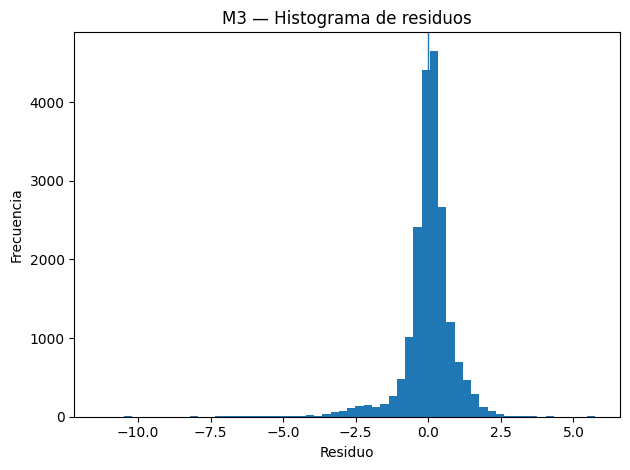

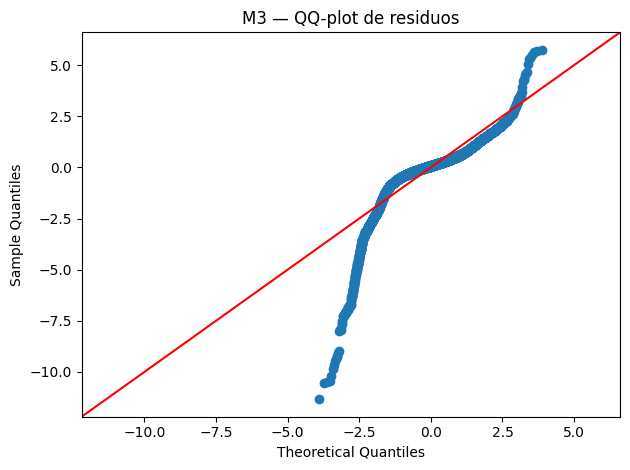

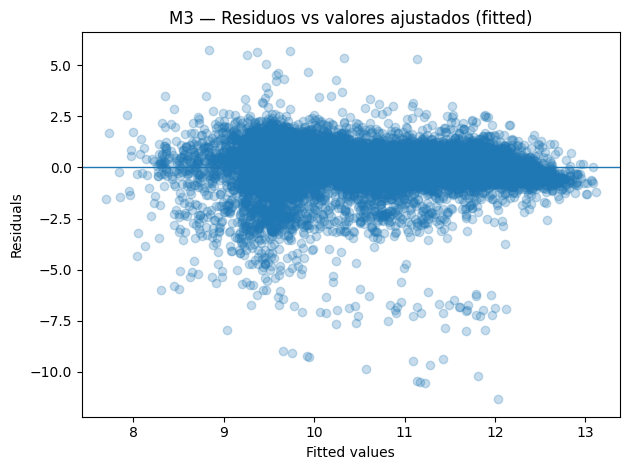

In [514]:
# Diagnósticos visuales del modelo final (M3) 
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

resid = m3.resid
fitted = m3.fittedvalues

# 1) Histograma de residuos
plt.figure()
plt.hist(resid, bins=60)
plt.axvline(0, linewidth=1)
plt.title("M3 — Histograma de residuos")
plt.xlabel("Residuo")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# 2) QQ-plot
fig = qqplot(resid, line="45")
plt.title("M3 — QQ-plot de residuos")
plt.tight_layout()
plt.show()

# 3) Residuos vs fitted
plt.figure()
plt.scatter(fitted, resid, alpha=0.25)
plt.axhline(0, linewidth=1)
plt.title("M3 — Residuos vs valores ajustados (fitted)")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()


## Interpretación de diagnósticos (M3)

**QQ-plot (comparación con ANOVA):** el patrón en “S” se mantiene muy parecido al del ANOVA. Esto sugiere que, aunque el modelo ahora controla por más covariables, **la forma de las colas de los residuos no cambia sustancialmente**. En otras palabras, la no-normalidad en las colas parece ser una característica de la distribución de salarios (y no solo del modelo simple).

**Residuos vs valores ajustados (comparación con ANOVA):** ahora el gráfico deja de mostrar tres bandas verticales, porque **M3 genera valores ajustados continuos** (ya no solo tres medias por modalidad). Además, la nube revela **heterocedasticidad más visible**: la dispersión de residuos es mayor en ciertos rangos de valores ajustados y tiende a estrecharse hacia los niveles más altos. Este cambio es esperable al incorporar múltiples bloques (experiencia, educación, rol y país), ya que el modelo explica más variación sistemática y deja patrones de varianza residual que antes quedaban ocultos en las tres bandas del ANOVA.

**Conclusión conjunta:** los diagnósticos indican **colas pesadas** y **varianza no constante**, pero **no invalidan el modelo**. Lo que implican es que la inferencia clásica debe tomarse con cautela, y por eso en el análisis principal usamos **errores estándar robustos (HC3)**. En síntesis, **M3 sigue siendo el más adecuado** para RQ2: explica mucha más variabilidad, compara modalidades dentro de país y ofrece inferencia más confiable bajo heterocedasticidad.



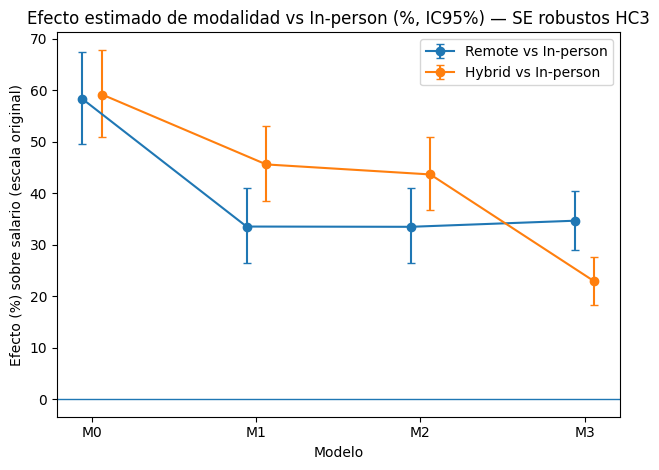

In [515]:
# === Visual final: Coefplot (efecto % e IC95% en HC3) a través de modelos M0–M3 ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

order = ["M0", "M1", "M2", "M3"]
models = {"M0": m0, "M1": m1, "M2": m2, "M3": m3}

def _contrast_label(term: str) -> str:
    if (RW_HYB in term) or ("T.Hybrid" in term) or ("Hybrid" in term):
        return "Hybrid vs In-person"
    if ("T.Remote" in term) or (f"T.{RW_REM}" in term):
        return "Remote vs In-person"
    return term

rows = []
for name, res in models.items():
    ef = remote_effects(res).copy()
    ef["term"] = ef.index
    ef["model"] = name
    ef["contrast"] = ef["term"].apply(_contrast_label)
    rows.append(ef.reset_index(drop=True))

plot_df = pd.concat(rows, ignore_index=True)
plot_df = plot_df[plot_df["contrast"].isin(["Remote vs In-person", "Hybrid vs In-person"])].copy()
plot_df["model"] = pd.Categorical(plot_df["model"], categories=order, ordered=True)
plot_df = plot_df.sort_values(["contrast", "model"])

plot_df["err_lo"] = plot_df["pct_effect"] - plot_df["ci_low_pct"]
plot_df["err_hi"] = plot_df["ci_high_pct"] - plot_df["pct_effect"]

x = np.arange(len(order))

plt.figure()
for contrast, offset in [("Remote vs In-person", -0.06), ("Hybrid vs In-person", 0.06)]:
    sub = plot_df[plot_df["contrast"] == contrast].set_index("model").reindex(order).reset_index()
    y = sub["pct_effect"].values
    yerr = np.vstack([sub["err_lo"].values, sub["err_hi"].values])
    plt.errorbar(x + offset, y, yerr=yerr, fmt="o-", capsize=3, label=contrast)

plt.axhline(0, linewidth=1)
plt.xticks(x, order)
plt.title("Efecto estimado de modalidad vs In-person (%, IC95%) — SE robustos HC3")
plt.xlabel("Modelo")
plt.ylabel("Efecto (%) sobre salario (escala original)")
plt.legend()
plt.tight_layout()
plt.show()


## Lectura del coefplot (M0–M3)

El coefplot resume visualmente cómo cambian los efectos de `RemoteWork` al añadir controles. En **M0** las brechas son grandes (≈ **59%** para *Remote* y *Hybrid* vs **In-person**), pero al incluir **experiencia** en **M1** caen de forma marcada. En **M2** los efectos se estabilizan, lo que sugiere que educación y rol explican parte del salario, pero no alteran el contraste entre modalidades.

El cambio más fuerte aparece en **M3**: al controlar por **país**, el efecto de *Hybrid vs In-person* baja a ≈ **22.9%**, mientras que *Remote vs In-person* se mantiene alrededor de **34.7%**. Esto indica que una parte importante de la brecha híbrida estaba asociada a composición por país, mientras que la brecha remota es más robusta al ajuste.



## Respuesta a RQ2 

**RQ2:** ¿Se mantiene una asociación entre modalidad de trabajo y salario una vez que controlamos por experiencia, educación, rol y país?

Con el modelo ajustado **M3** la respuesta es **sí**: *Remote* y *Hybrid* siguen mostrando salarios promedio más altos que **In-person**, aunque con magnitudes **más moderadas**. La brecha **Remote vs In-person** se mantiene alrededor de **35%**, mientras que **Hybrid vs In-person** cae a cerca de **23%**.

**Comparación con RQ1:** en RQ1 observamos diferencias **crudas** entre modalidades (≈ **59%**), sin controlar factores de confusión. RQ2 muestra que **una parte sustantiva** de esas brechas se explica por experiencia, educación, rol y, sobre todo, país. En otras palabras, la modalidad **sigue asociada** al salario, pero la evidencia ajustada es **más realista y menos inflada** que en RQ1. Esto refuerza que RQ1 describe un patrón descriptivo, mientras que RQ2 entrega una asociación ajustada, **no causal**.


En términos prácticos, **aunque la diferencia no es tan grande**, el análisis ajustado sugiere que, en promedio, los puestos con modalidad **remota** o **híbrida** tienden a estar **mejor pagados** que los puestos presenciales.
